In [17]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import skew


# Load and Read the Data

In [2]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\rubin\\documents\\mids_w207_music_genre\\member_workspaces\\matt': ['.ipynb_checkpoints', 'data.pkl', 'dump_from_v1.3.4.pickle', 'mqr_working_v1.ipynb', 'README.md']


In [3]:
filepath = "C:\\Users\\rubin\\Documents\\W207\\mtg-jamendo-dataset\\acousticbrainz_all_flattened_labeled.pickle.bz2"


In [5]:
df_data = pd.read_pickle(filepath)

# Data

In [6]:
df_data

lowlevel_average_loudness  barkbands_crest_dmean  \
0                       0.968449               3.293026   
1                       0.908850               2.914450   
2                       0.887838               2.184494   
3                       0.905681               3.096488   
4                       0.961083               3.233357   
...                          ...                    ...   
55208                   0.883289               1.834368   
55209                   0.893461               2.625241   
55210                   0.847353               2.616198   
55211                   0.885353               2.413242   
55212                   0.153367               2.351942   

       barkbands_crest_dmean2  barkbands_crest_dvar  barkbands_crest_dvar2  \
0                    5.306374             11.905830              26.976095   
1                    4.544057             10.424618              22.059977   
2                    3.610394              6.883740              18.208929   
3                    4.707773              7.517008              15.814797   
4                    4.757804             11.201188              20.502659   
...                       ...                   ...                    ...   
55208                3.047448              4.022786              10.589743   
55209                4.300119              5.911533              16.060408   
55210                4.265483              6.555442              16.940145   
55211                4.026524              4.815686              12.849450   
55212                3.743695              5.111189              12.485005   

       barkbands_crest_max  barkbands_crest_mean  barkbands_crest_median  \
0                26.470682             16.392702               16.988634   
1                26.442808             11.546941                9.788353   
2                25.042086             10.551719                9.812689   
3                25.502550              9.600195                8.341887   
4                26.636238             14.233928               12.787280   
...                    ...                   ...                     ...   
55208            26.215147             14.509040               14.098436   
55209            25.105547             11.734536               11.193336   
55210            26.260620              9.426208                8.605682   
55211            26.592850             10.534431                9.937226   
55212            26.245548             11.644878               10.461223   

       barkbands_crest_min  barkbands_crest_var  ...  genre_soundtrack  \
0                 2.340423            29.690371  ...                 0   
1                 2.188384            37.147076  ...                 0   
2                 3.497549            15.491973  ...                 0   
3                 2.460896            22.141041  ...                 0   
4                 2.780514            34.144928  ...                 0   
...                    ...                  ...  ...               ...   
55208             5.116832            18.111525  ...                 0   
55209             2.965799            15.874013  ...                 0   
55210             2.171668            16.516331  ...                 0   
55211             2.521708            13.772280  ...                 0   
55212             2.530016            24.947344  ...                 0   

       genre_swing  genre_symphonic  genre_synthpop  genre_techno  \
0                0                0               0             1   
1                0                0               0             0   
2                0                0               0             0   
3                0                0               0             0   
4                0                0               0             0   
...            ...              ...             ...           ...   
55208            0                0               0             0   
55209  

In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55213 entries, 0 to 55212
Columns: 2877 entries, lowlevel_average_loudness to genre_worldfusion
dtypes: float64(2600), int64(149), object(128)
memory usage: 1.2+ GB


In [29]:
df_data.isnull().sum().sort_values(ascending = False)

tags_initialkey         55212
tags_originalartist     55211
tags_albumartistsort    55211
tags_website            55211
tags_lyricist           55211
                        ...  
erbbands_dvar2_2            0
erbbands_dvar2_3            0
erbbands_dvar2_4            0
erbbands_dvar2_5            0
genre_worldfusion           0
Length: 2877, dtype: int64

In [8]:
print(df_data.shape)

(55213, 2877)


# Summary of Columns

In [11]:
df_data.describe()

lowlevel_average_loudness  barkbands_crest_dmean  \
count               5.521300e+04           55213.000000   
mean                7.492438e-01               2.574667   
std                 2.612856e-01               0.614857   
min                 6.453744e-07               0.028645   
25%                 6.595086e-01               2.138525   
50%                 8.649257e-01               2.536710   
75%                 9.348526e-01               2.980520   
max                 9.882686e-01               5.739379   

       barkbands_crest_dmean2  barkbands_crest_dvar  barkbands_crest_dvar2  \
count            55213.000000          55213.000000           55213.000000   
mean                 4.098666              6.662401              16.032422   
std                  1.015257              2.850503               6.381813   
min                  0.043310              0.050565               0.074538   
25%                  3.397664              4.512414              11.355373   
50%                  4.052002              6.172462              15.202328   
75%                  4.751215              8.354598              19.853962   
max                 10.581625             27.803631              77.119873   

       barkbands_crest_max  barkbands_crest_mean  barkbands_crest_median  \
count         55213.000000          55213.000000            55213.000000   
mean             25.941653             12.339080               11.692343   
std               1.064830              2.335958                2.713667   
min              14.644026              4.437052                3.429492   
25%              25.561016             10.698811                9.834431   
50%              26.289347             12.149377               11.322237   
75%              26.680487             13.754573               13.114269   
max              27.000000             26.901579               26.916988   

       barkbands_crest_min  barkbands_crest_var  ...  genre_soundtrack  \
count         55213.000000         55213.000000  ...      55213.000000   
mean              2.810041            23.125770  ...          0.146596   
std               0.691398             9.098947  ...          0.353706   
min               1.314467             0.130687  ...          0.000000   
25%               2.311724            16.510799  ...          0.000000   
50%               2.650568            21.410192  ...          0.000000   
75%               3.156872            27.989716  ...          0.000000   
max               7.309016            78.484970  ...          1.000000   

        genre_swing  genre_symphonic  genre_synthpop  genre_techno  \
count  55213.000000     55213.000000    55213.000000  55213.000000   
mean       0.003061         0.012896        0.011501      0.039465   
std        0.055241         0.112825        0.106625      0.194701   
min        0.000000         0.000000        0.000000      0.000000   
25%        0.000000         0.000000        0.000000      0.000000   
50%        0.000000         0.000000        0.000000      0.000000   
75%        0.000000         0.000000        0.000000      0.000000   
max        1.000000         1.000000        1.000000      1.000000   

       genre_trance  genre_tribal  genre_triphop   genre_world  \
count  55213.000000   55213.00000   55213.000000  55213.000000   
mean       0.027675       0.00317       0.024324      0.034177   
std        0.164040       0.05621       0.154054      0.181685   
min        0.000000       0.00000       0.000000      0.000000   
25%        0.000000       0.00000       0.000000      0.000000   
50%        0.000000       0.00000       0.000000      0.000000   
75%        0.000000       0.00000       0.000000      0.000000   
max        1.000000       1.00000       1.000000      1.000000   

       genre_worldfusion  
count       55213.000000  
mean            0.003876  
std             0.062137  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%  

# Create Histogram Plots for each Column

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated fun

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated fun

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rubin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: setting an array element with a sequence.

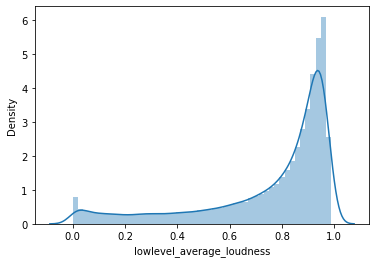

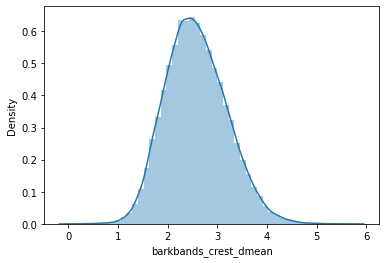

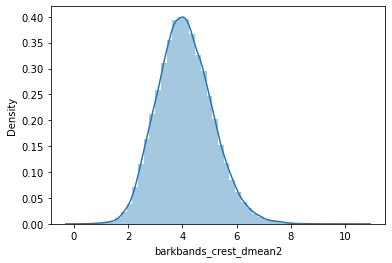

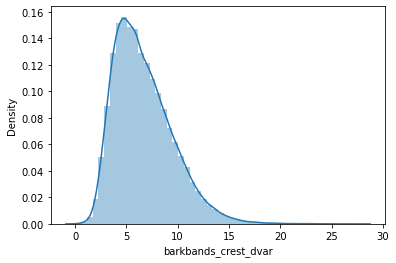

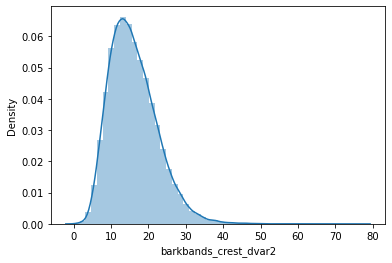

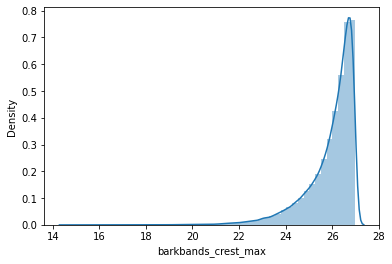

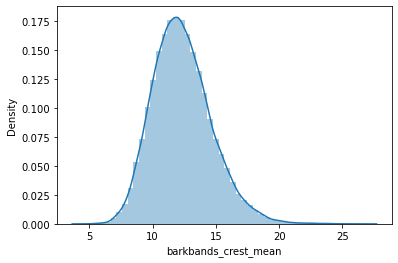

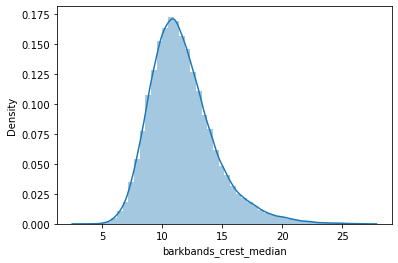

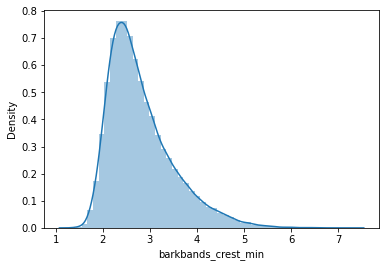

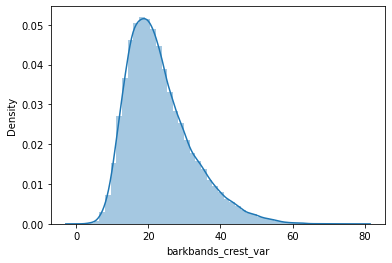

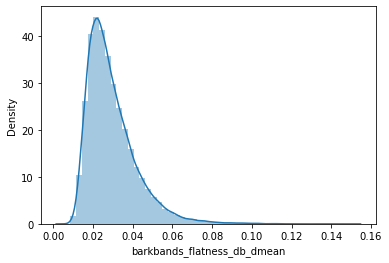

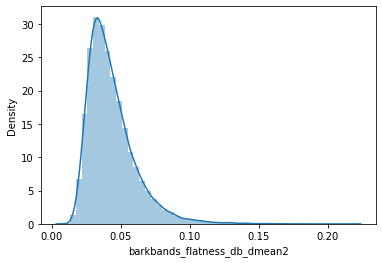

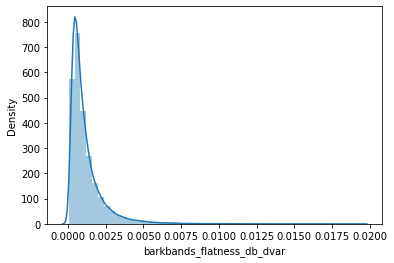

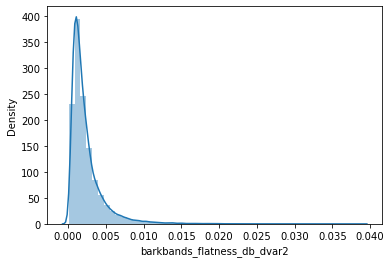

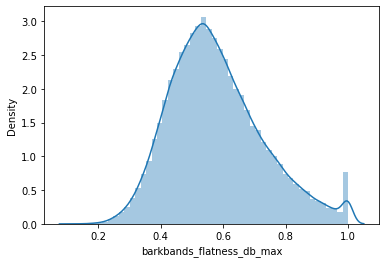

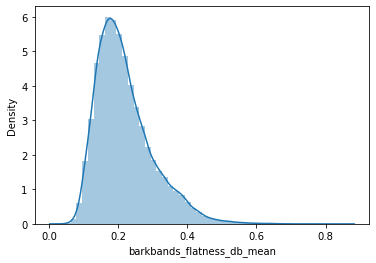

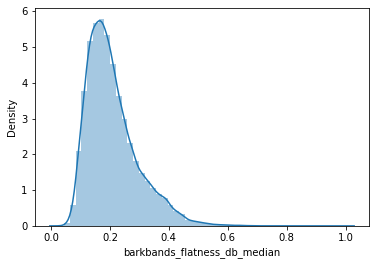

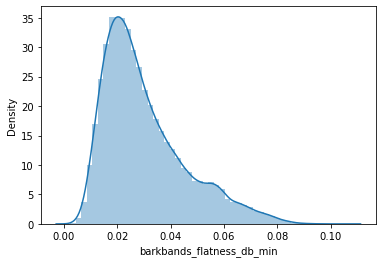

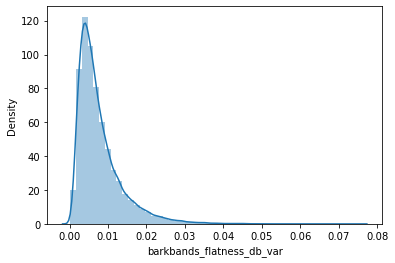

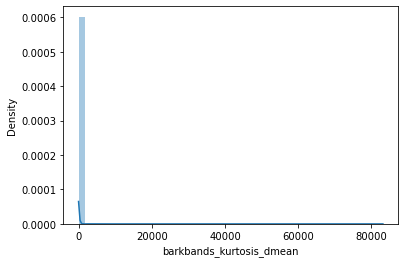

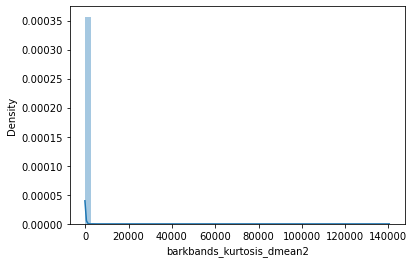

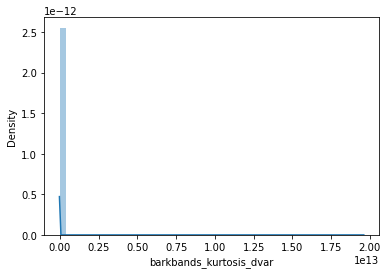

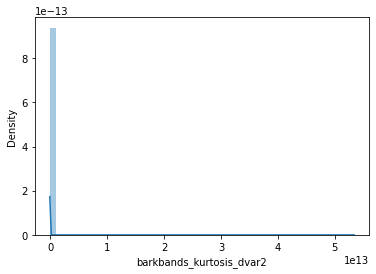

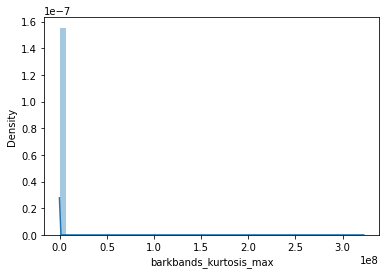

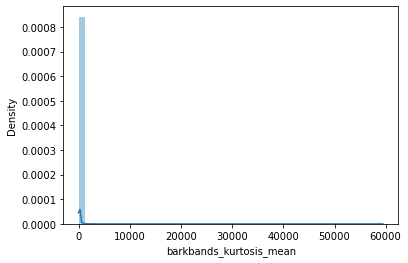

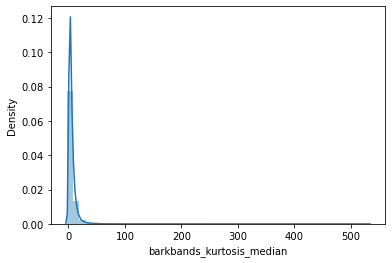

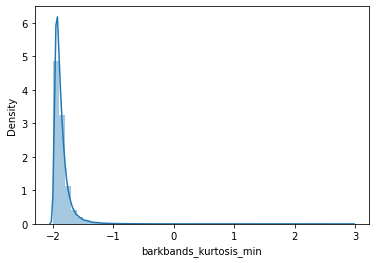

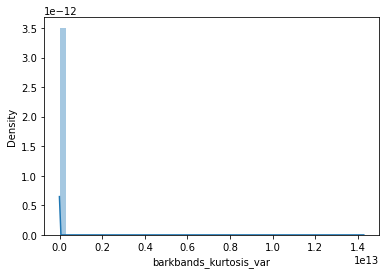

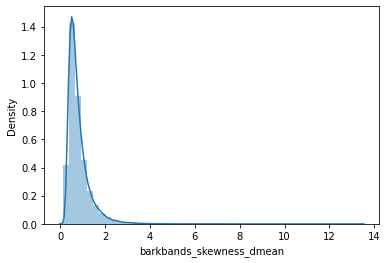

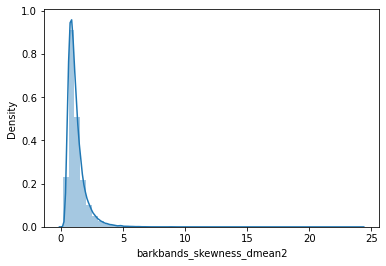

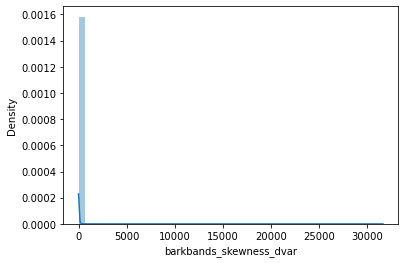

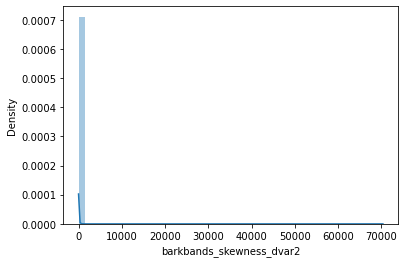

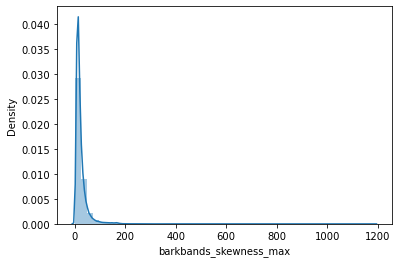

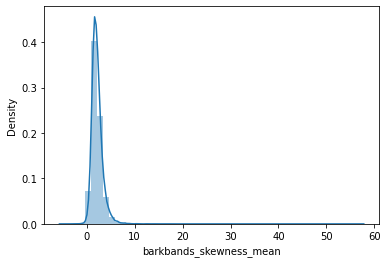

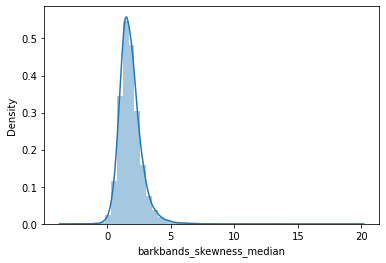

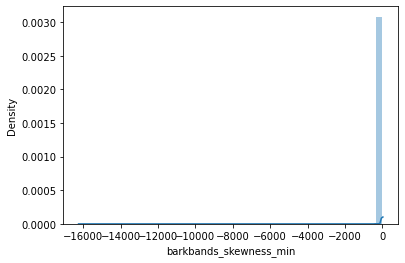

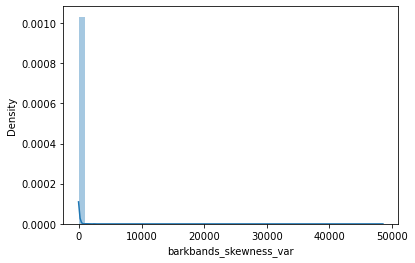

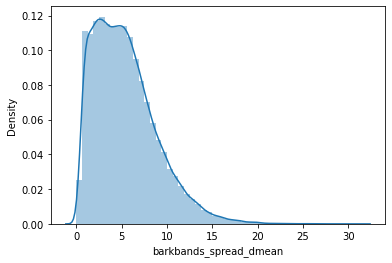

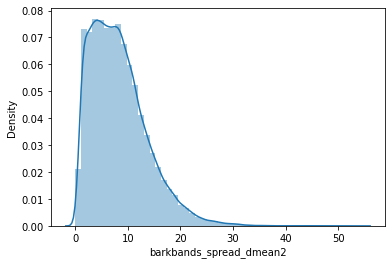

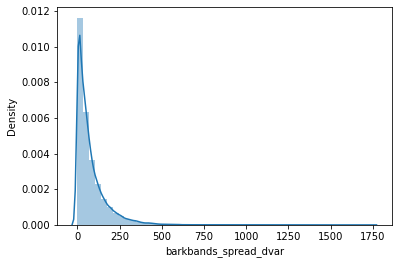

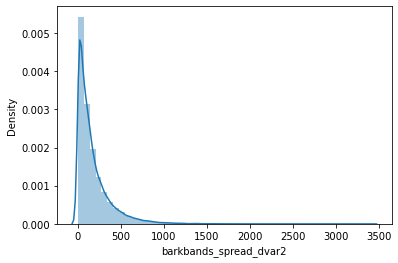

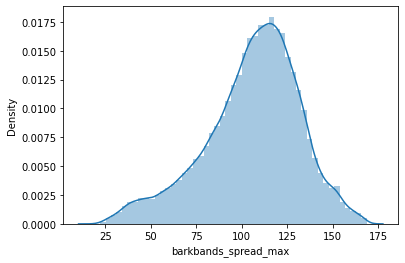

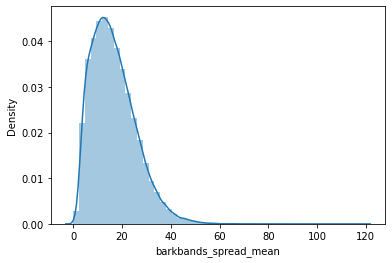

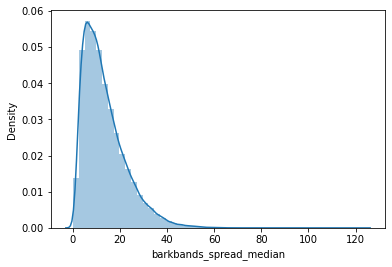

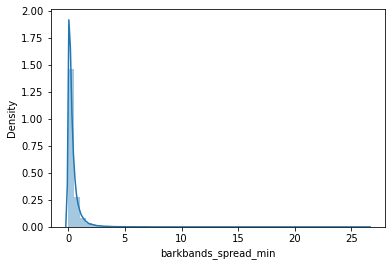

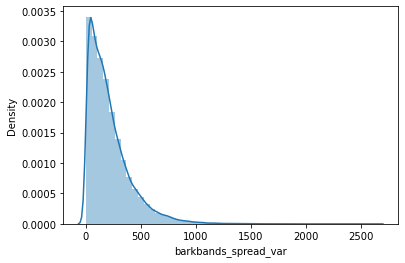

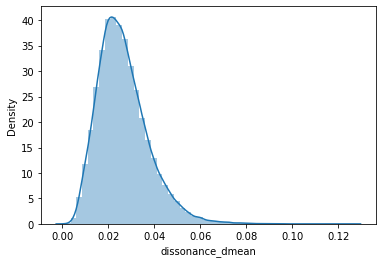

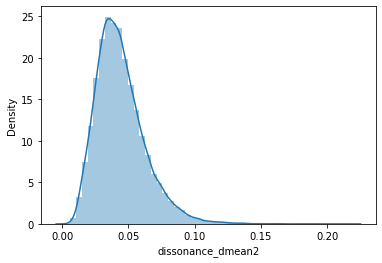

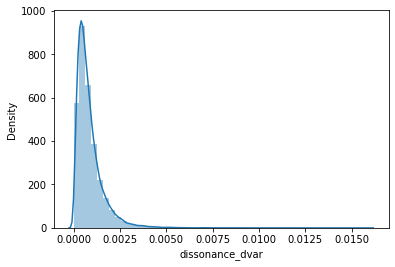

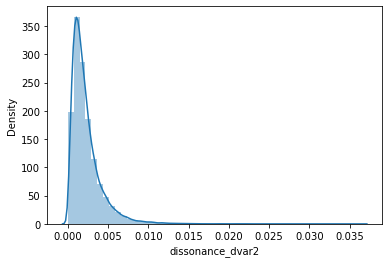

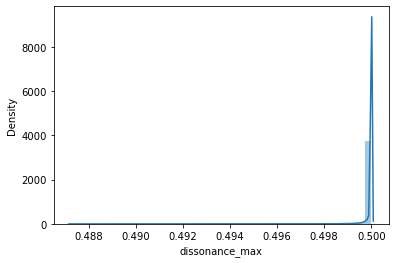

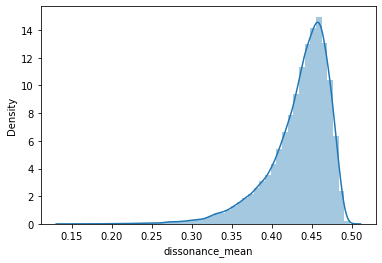

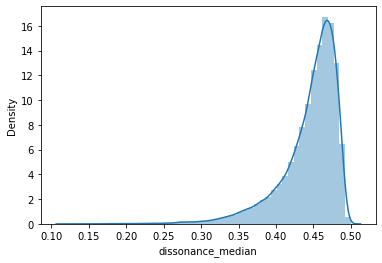

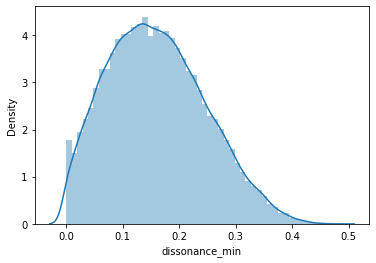

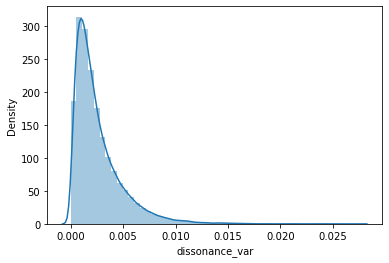

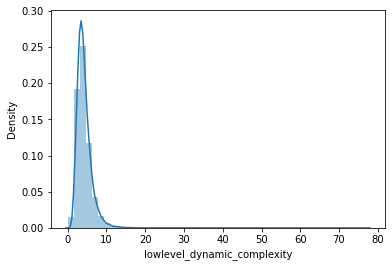

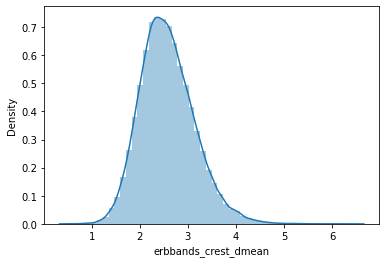

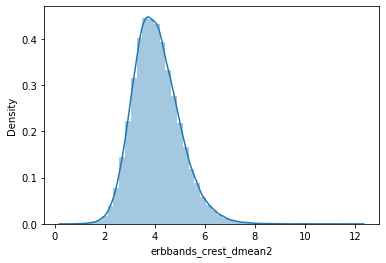

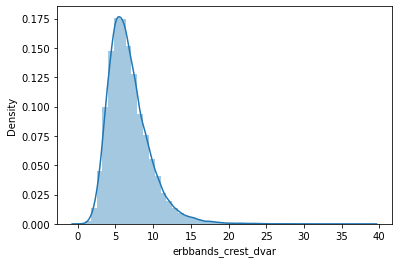

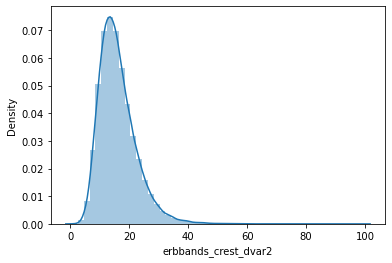

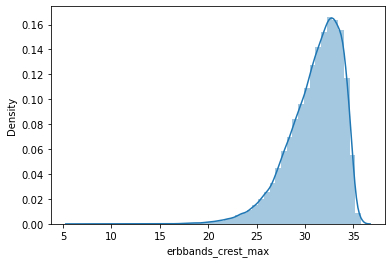

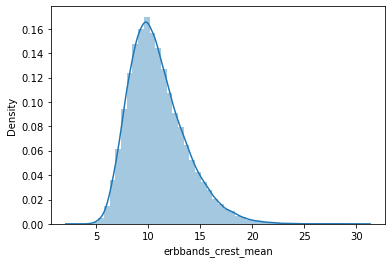

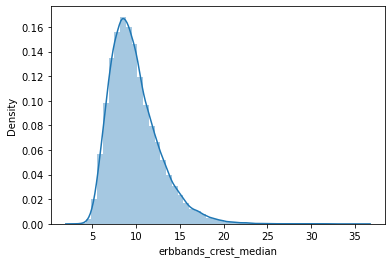

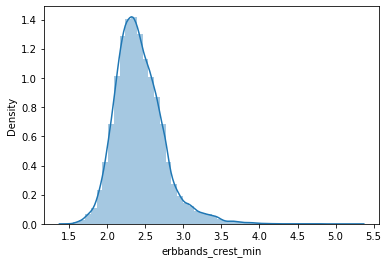

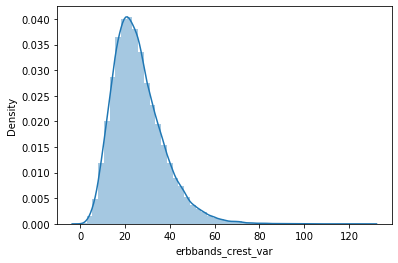

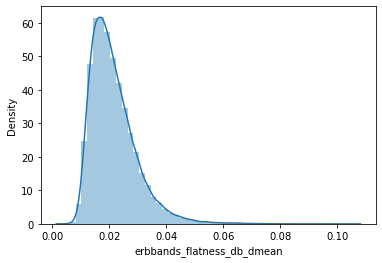

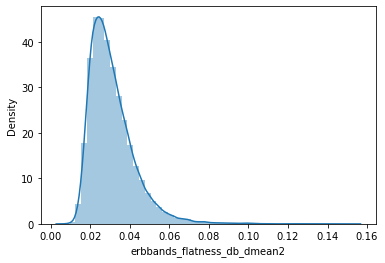

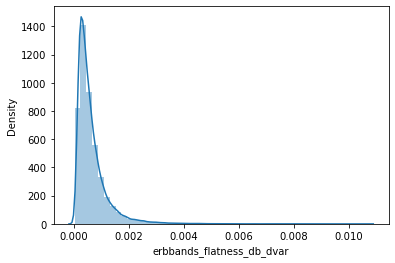

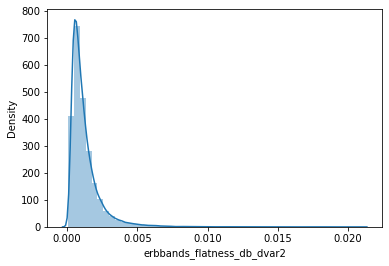

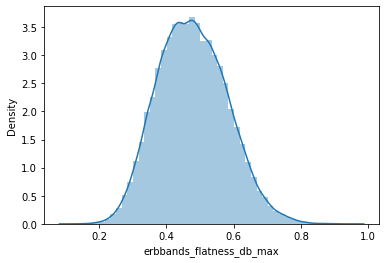

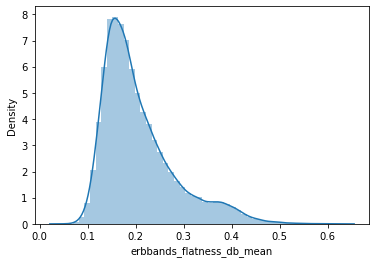

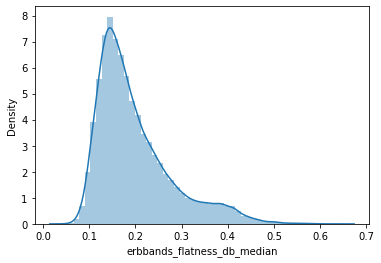

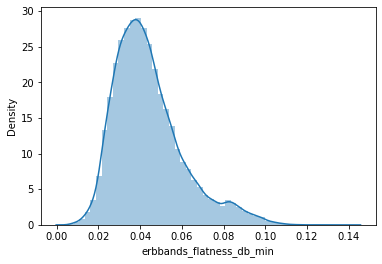

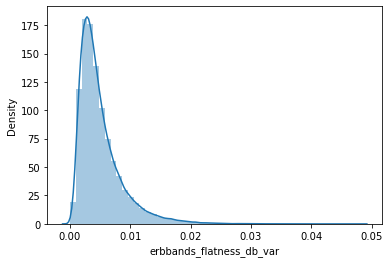

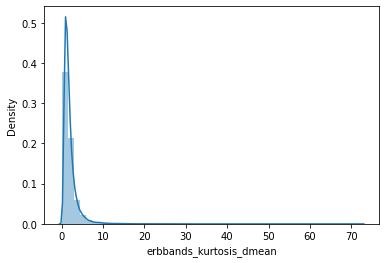

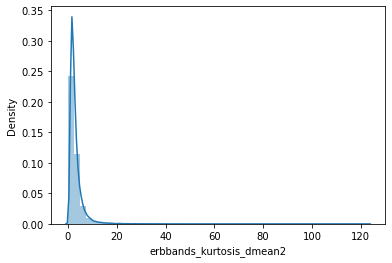

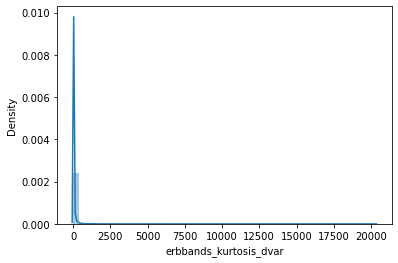

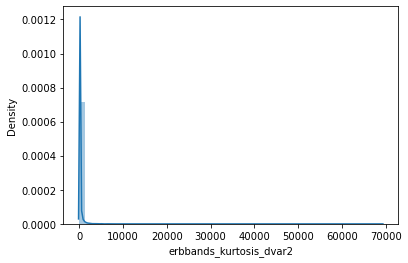

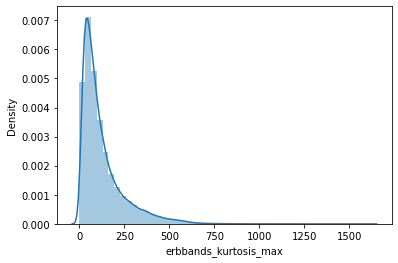

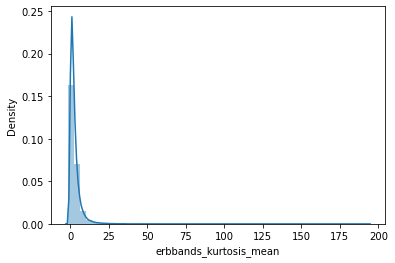

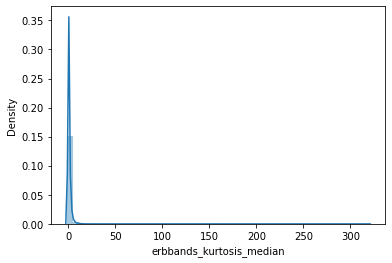

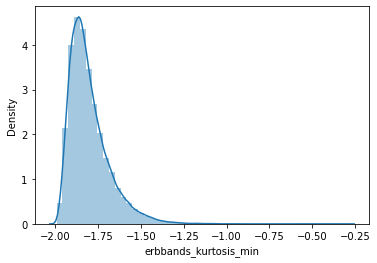

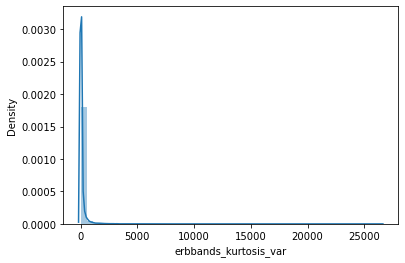

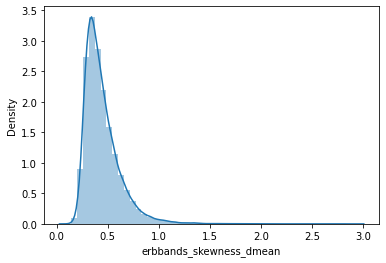

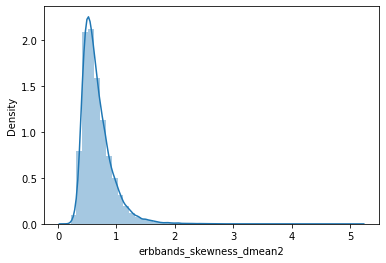

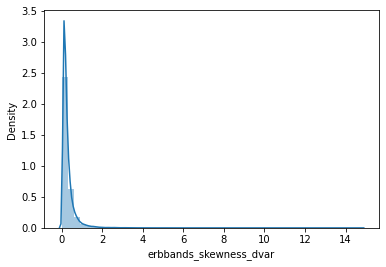

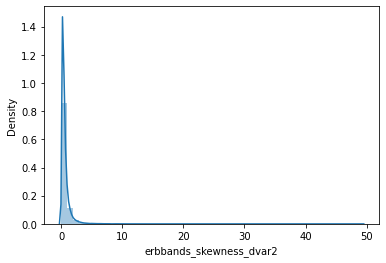

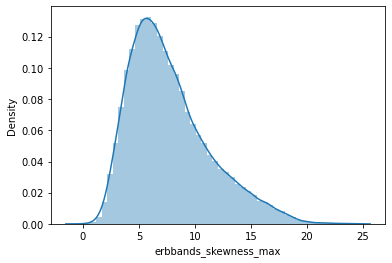

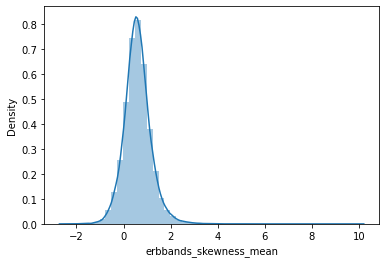

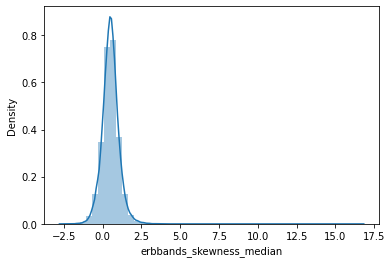

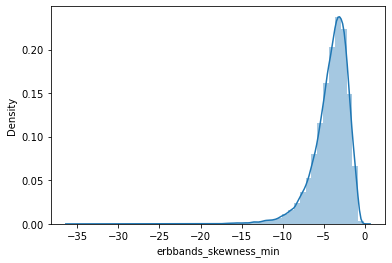

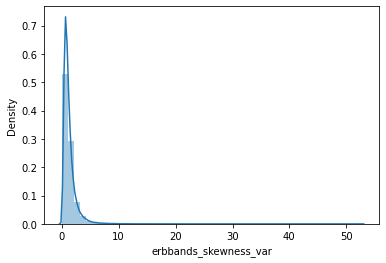

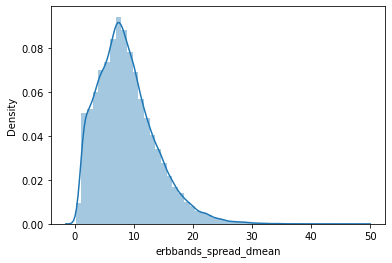

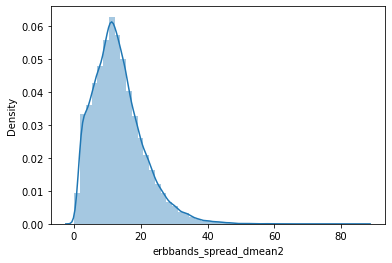

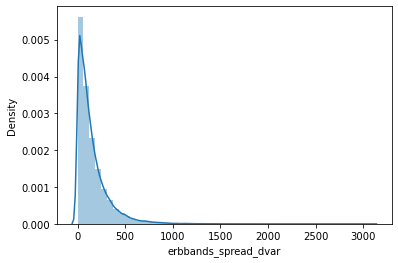

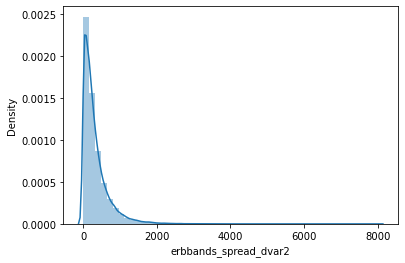

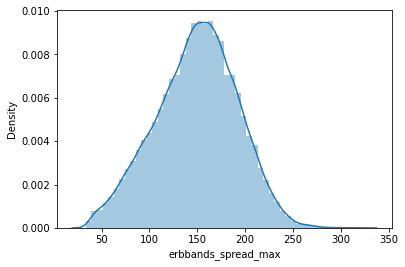

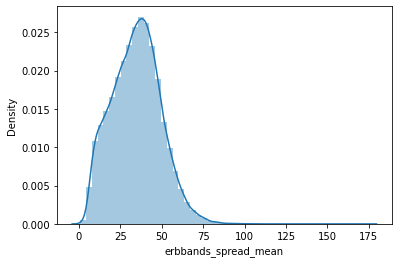

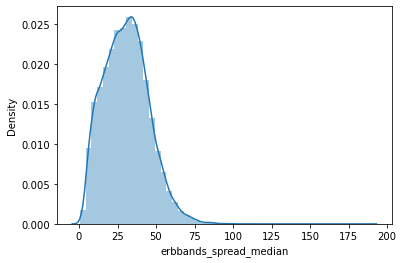

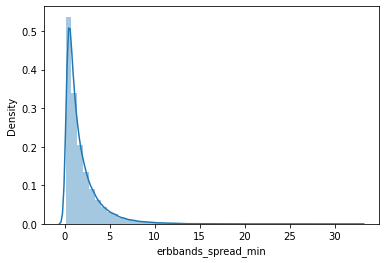

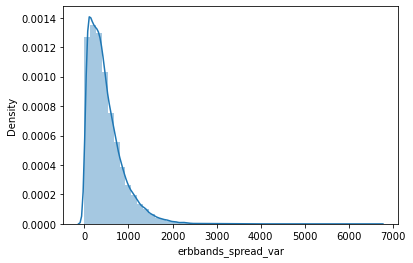

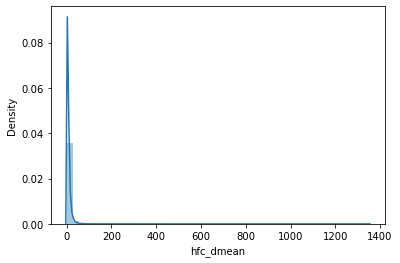

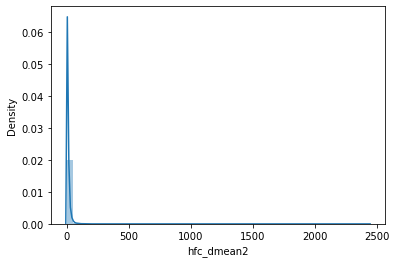

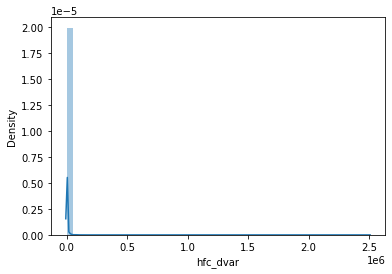

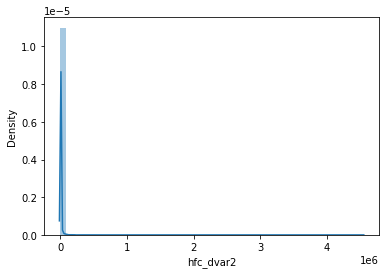

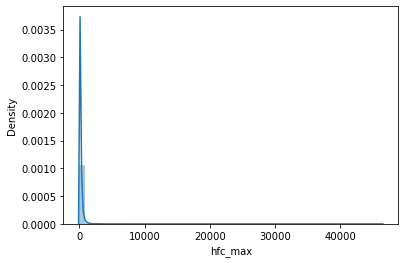

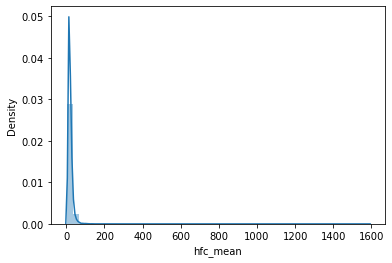

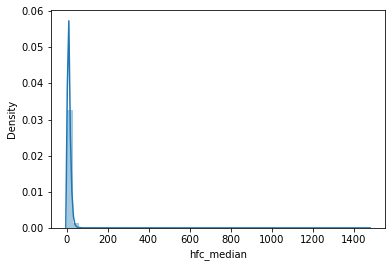

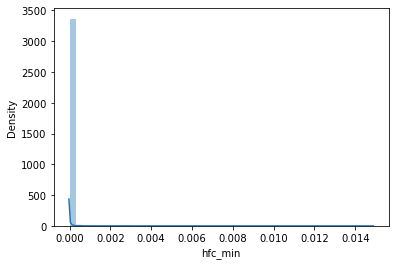

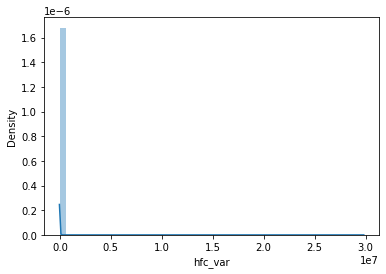

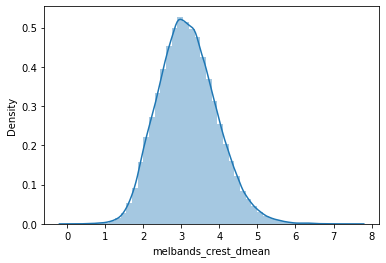

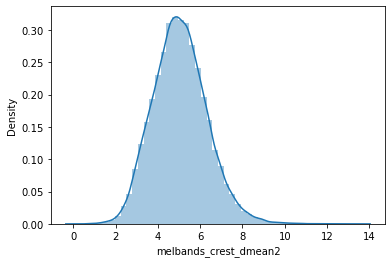

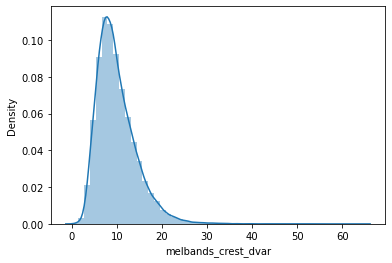

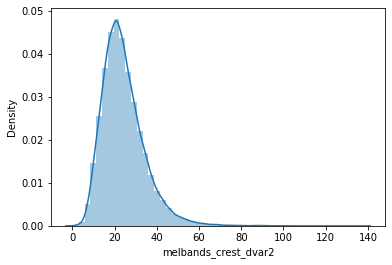

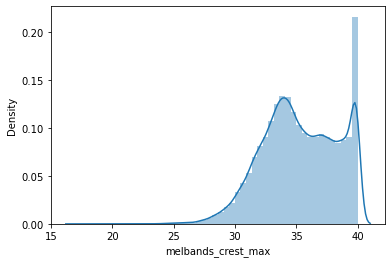

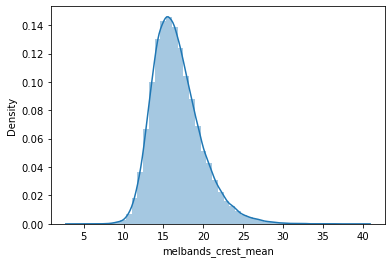

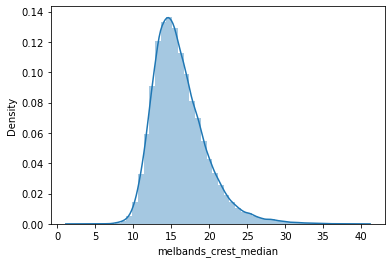

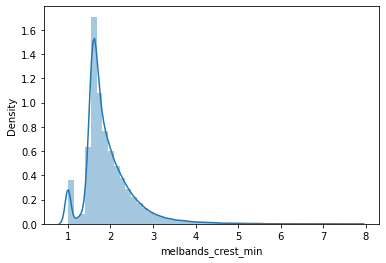

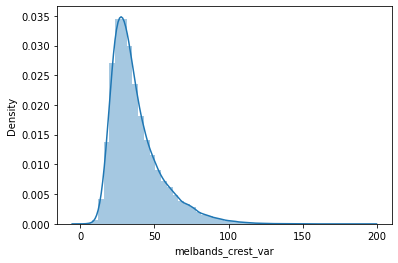

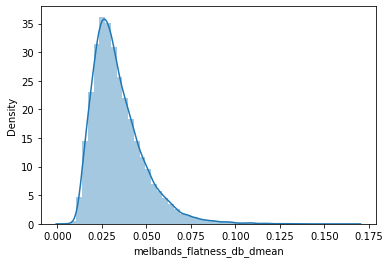

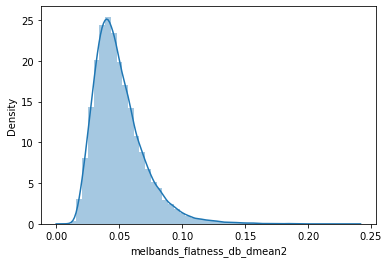

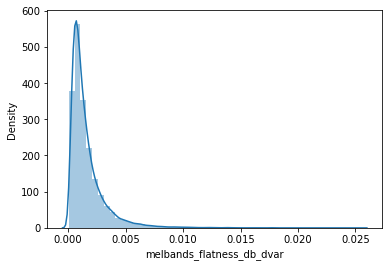

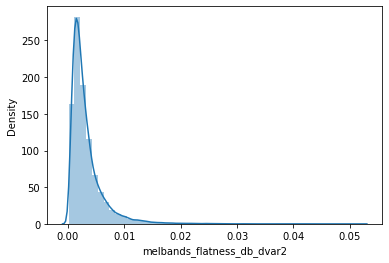

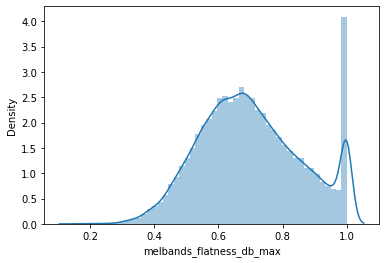

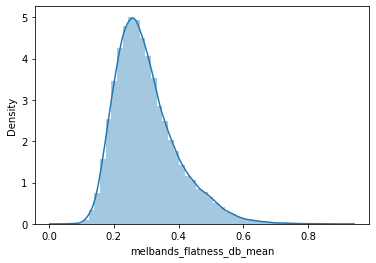

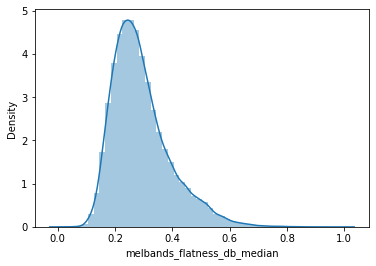

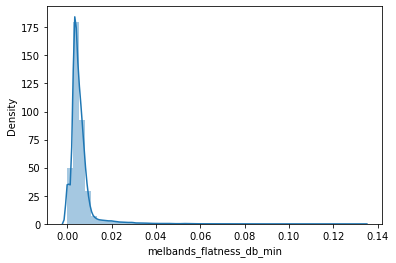

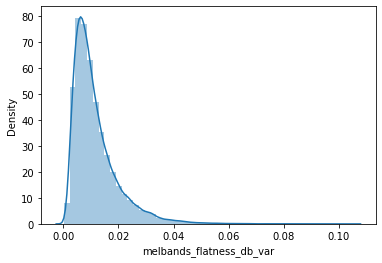

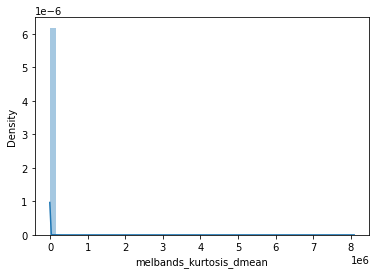

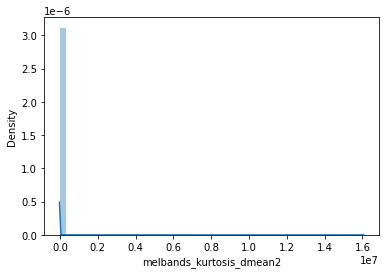

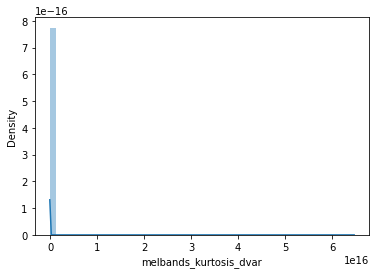

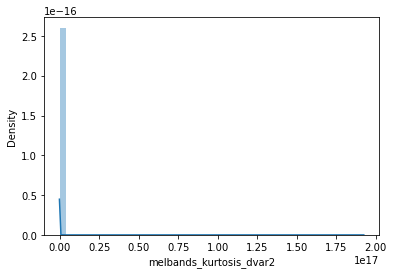

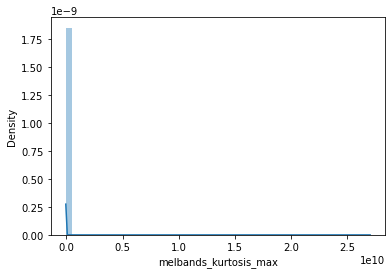

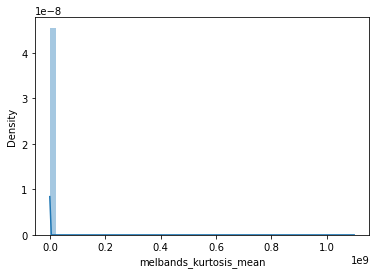

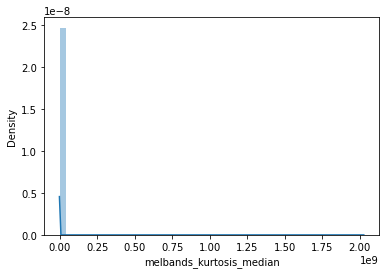

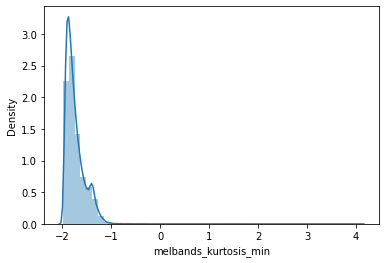

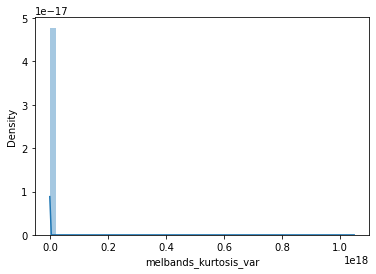

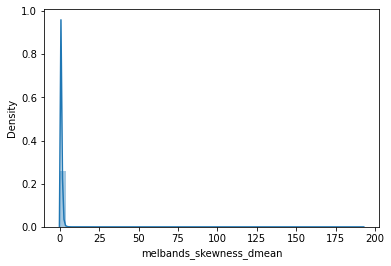

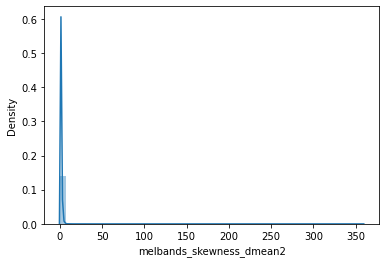

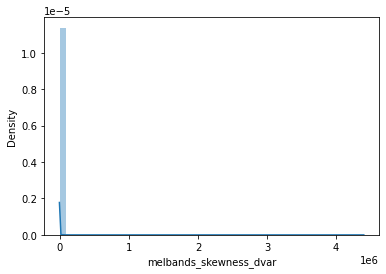

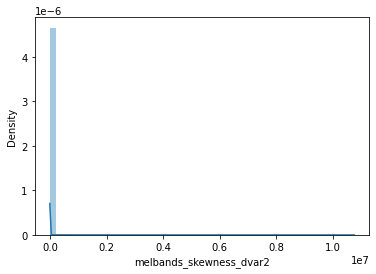

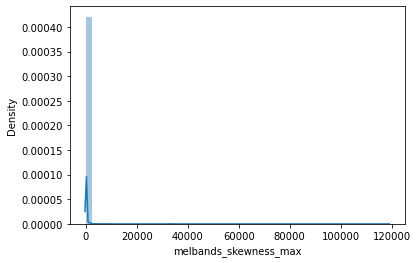

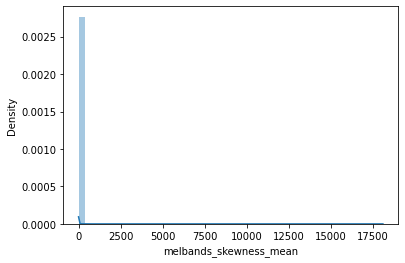

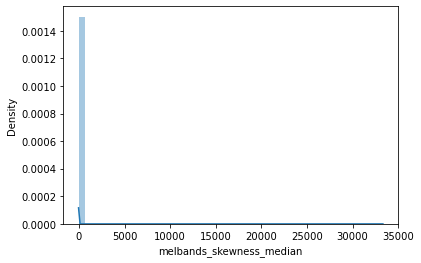

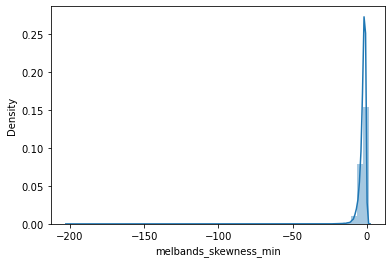

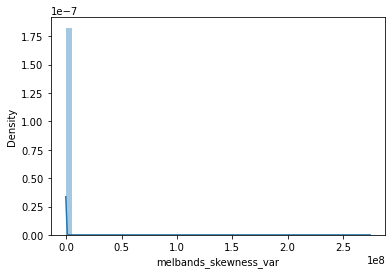

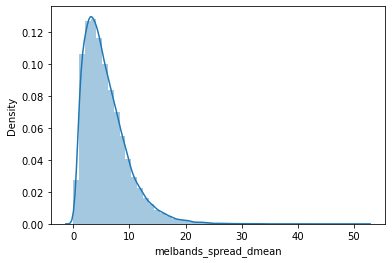

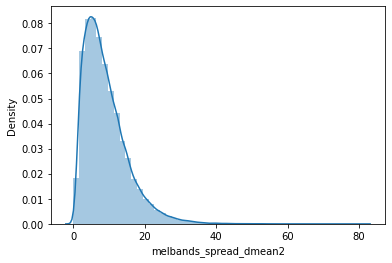

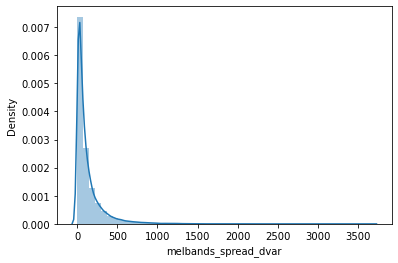

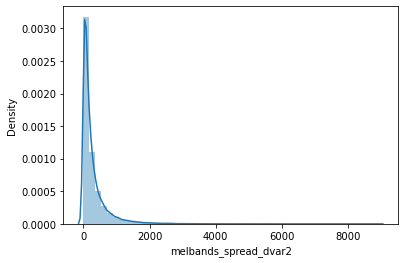

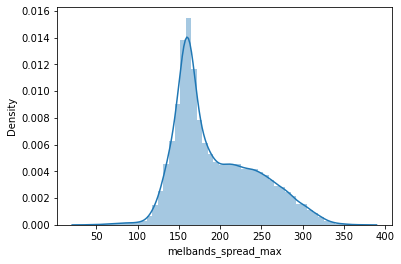

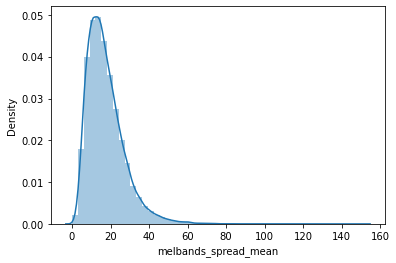

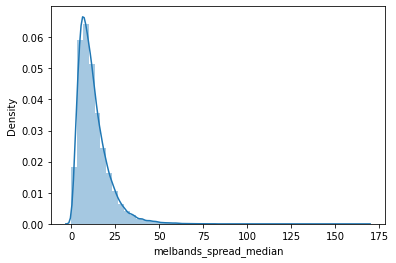

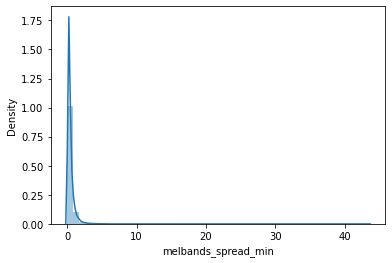

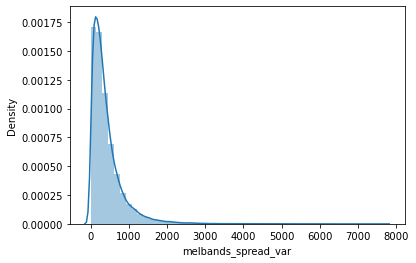

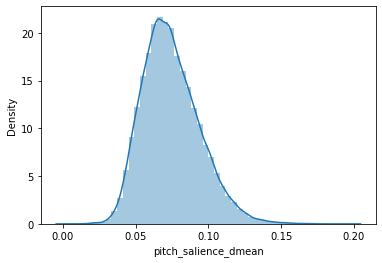

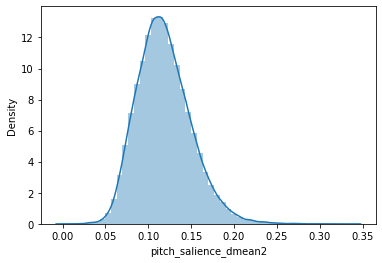

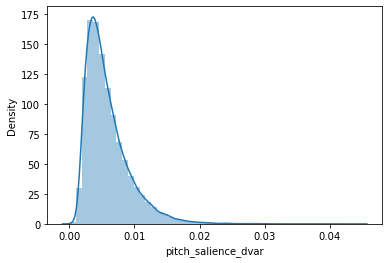

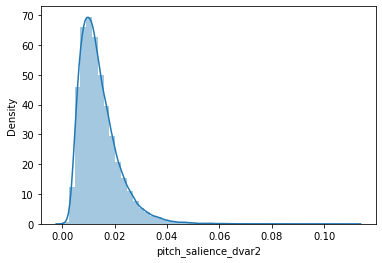

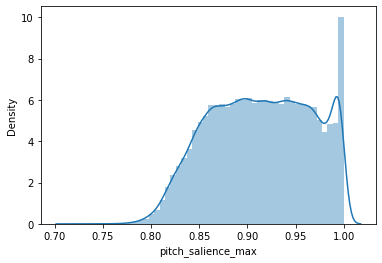

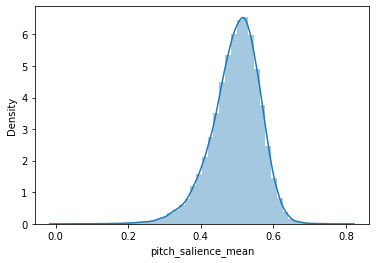

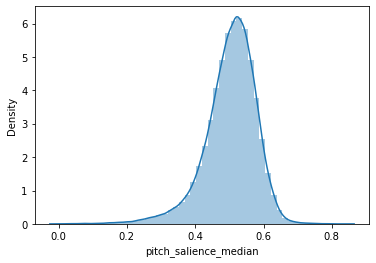

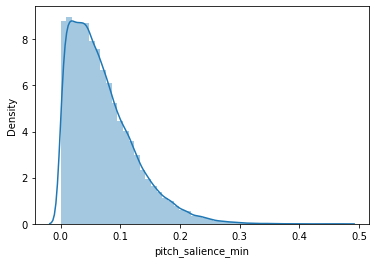

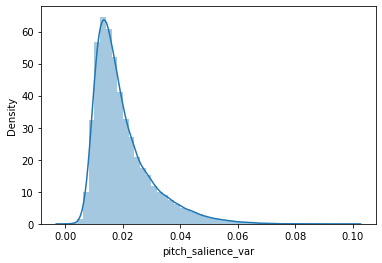

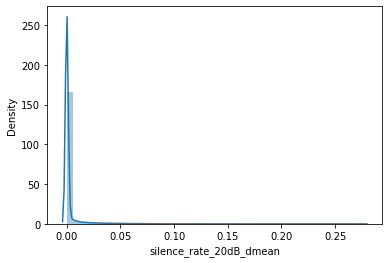

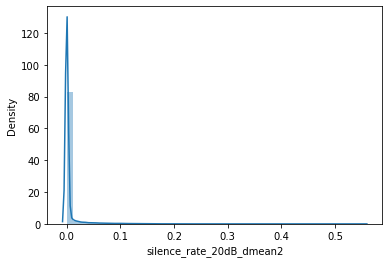

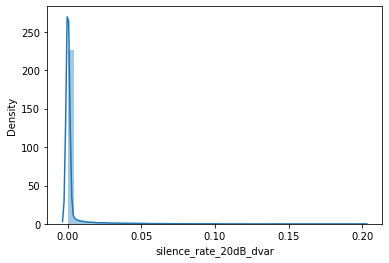

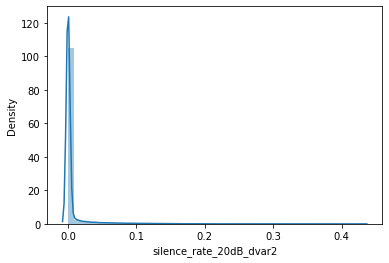

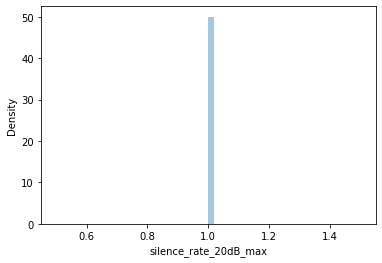

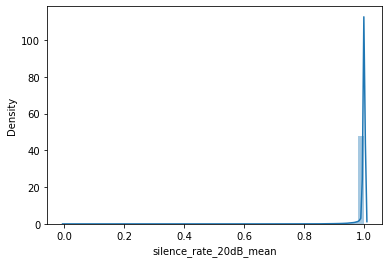

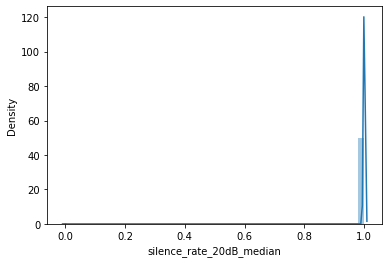

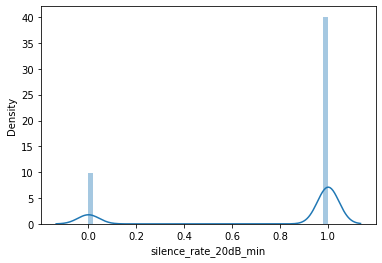

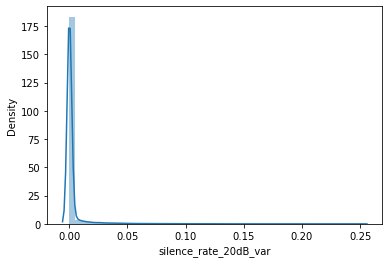

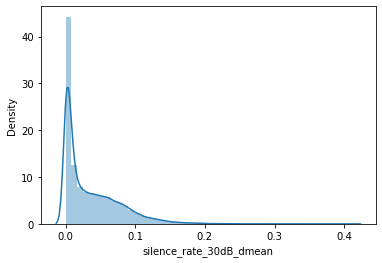

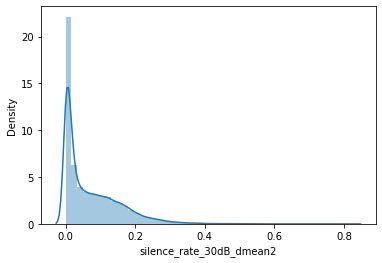

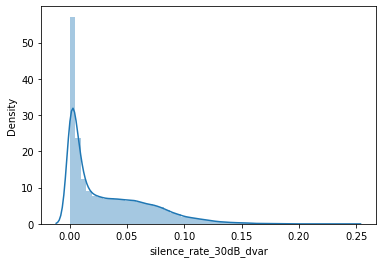

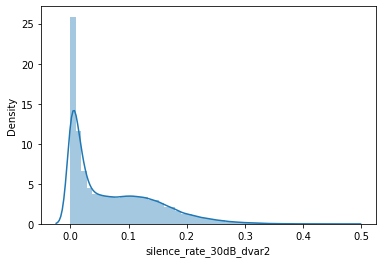

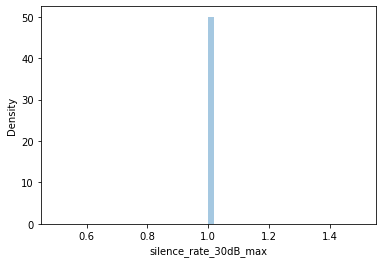

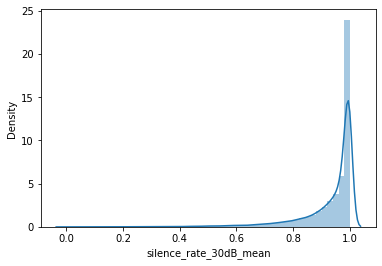

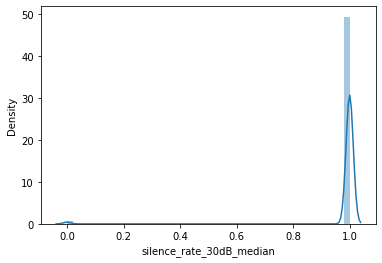

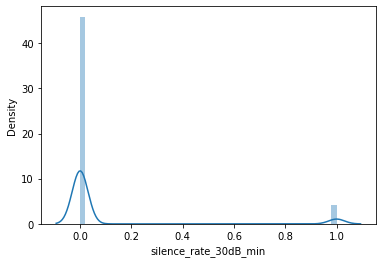

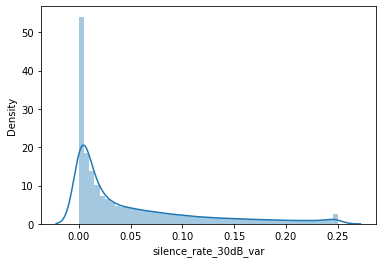

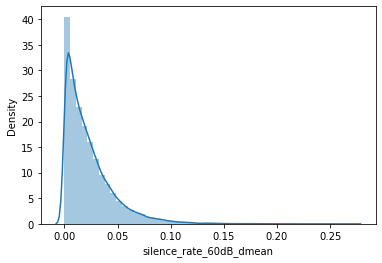

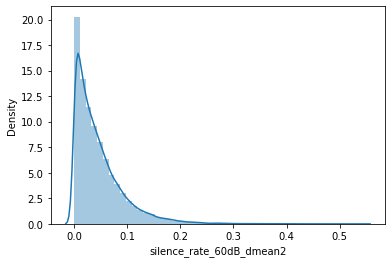

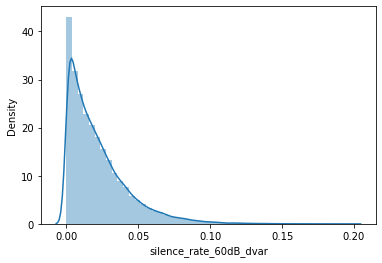

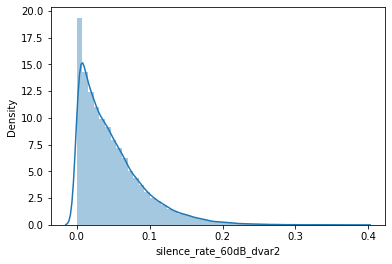

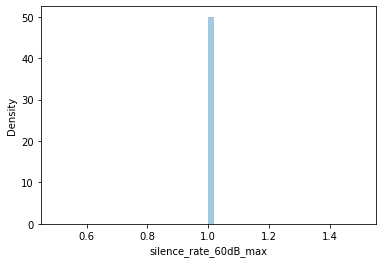

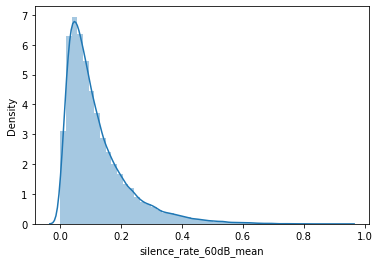

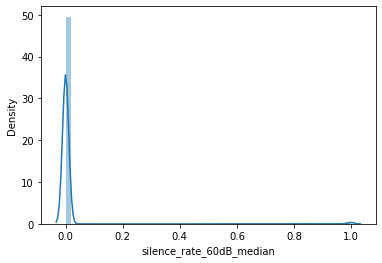

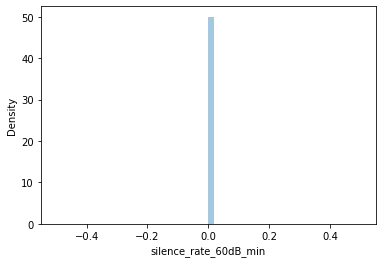

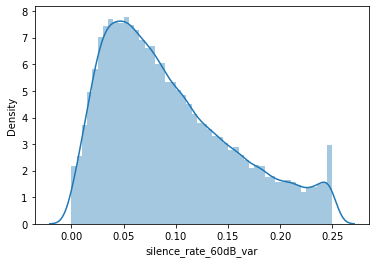

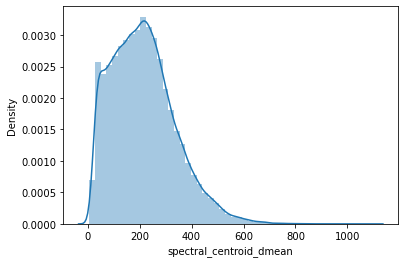

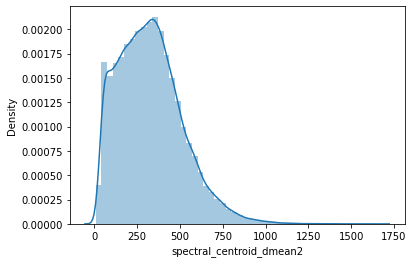

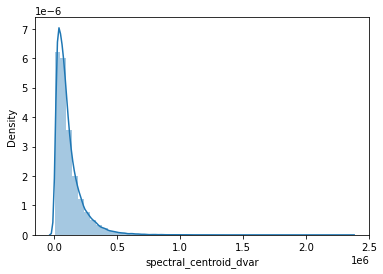

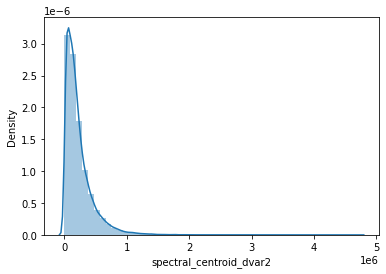

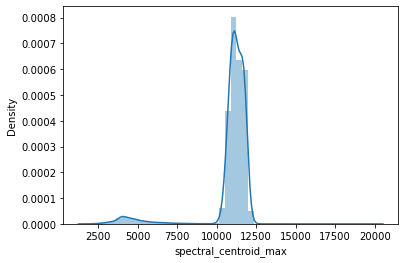

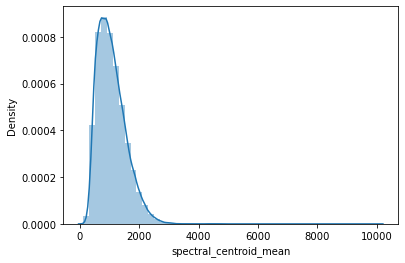

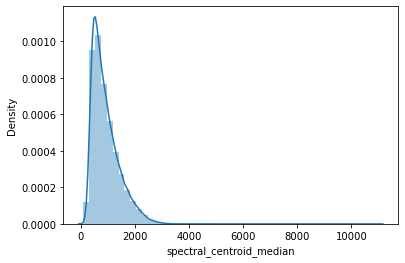

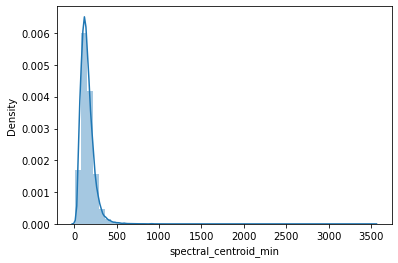

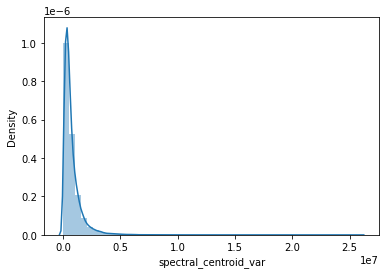

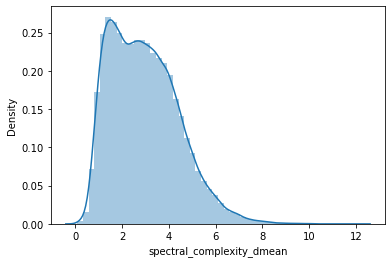

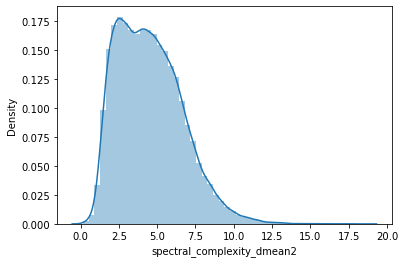

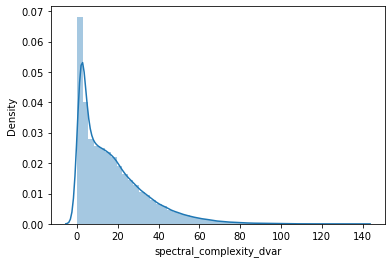

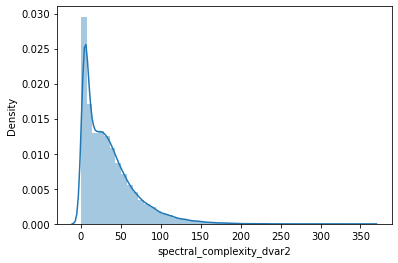

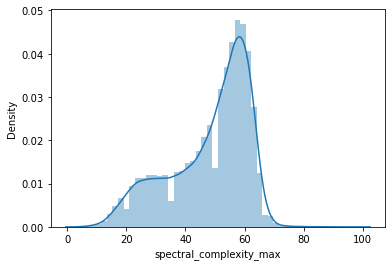

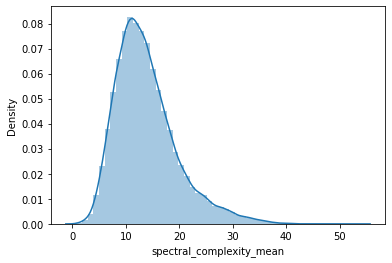

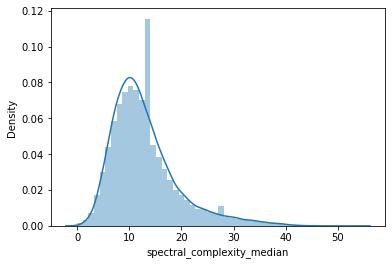

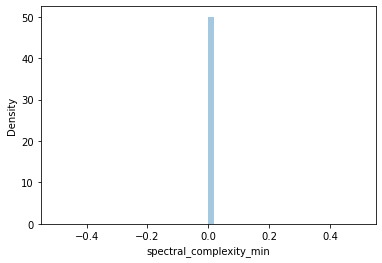

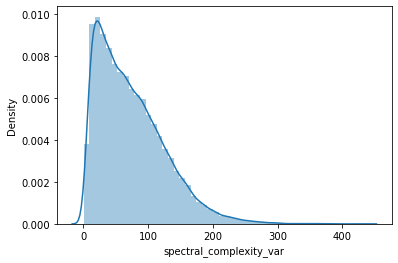

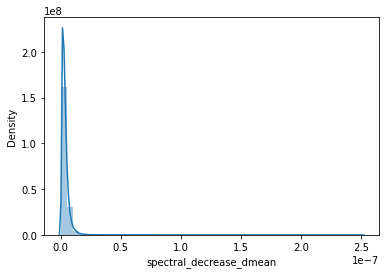

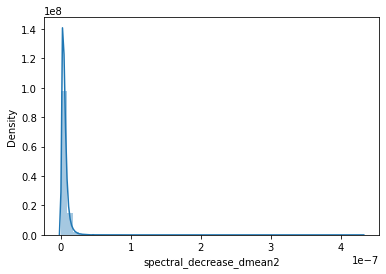

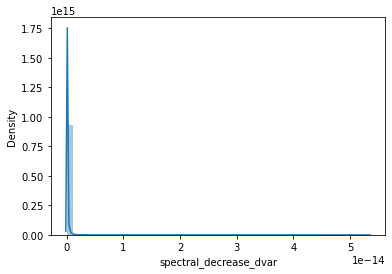

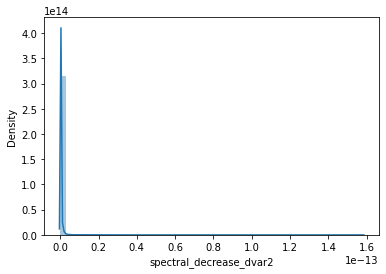

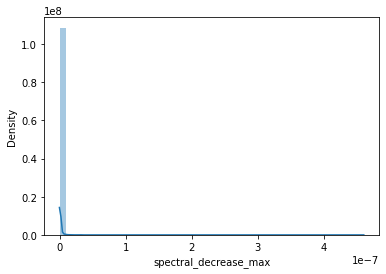

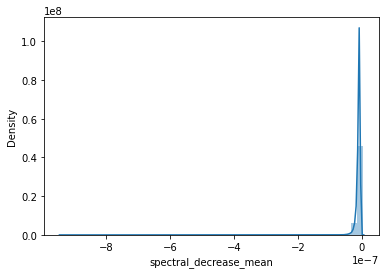

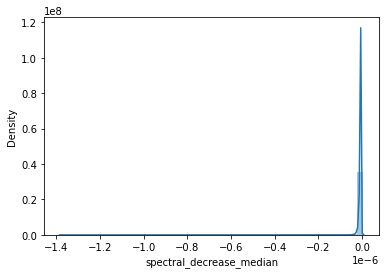

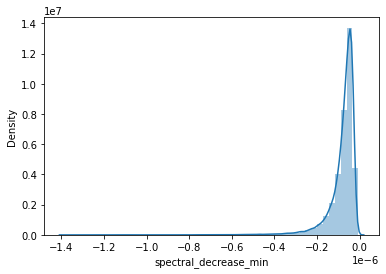

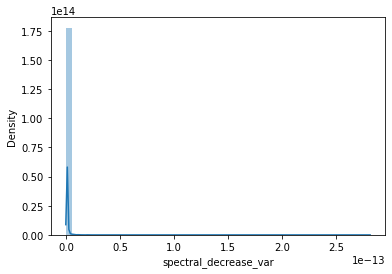

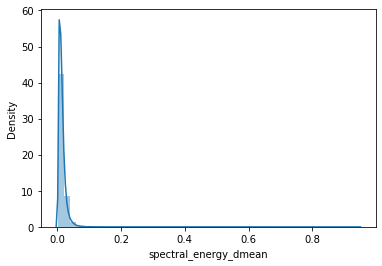

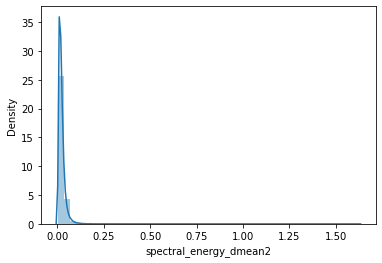

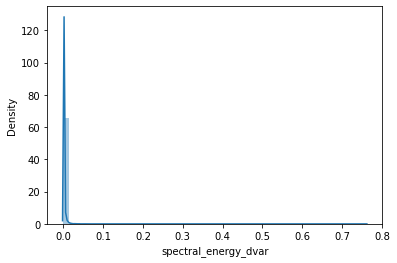

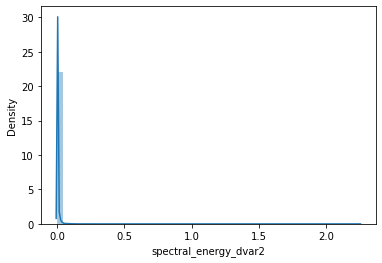

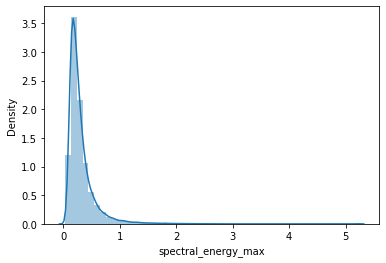

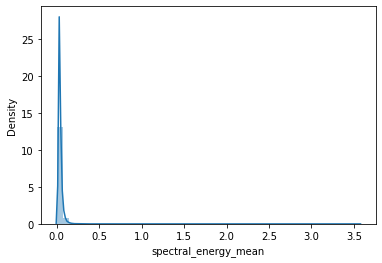

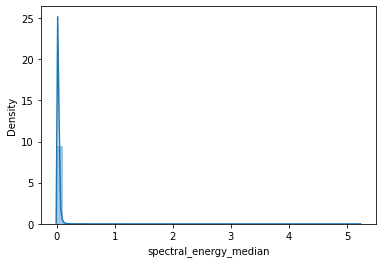

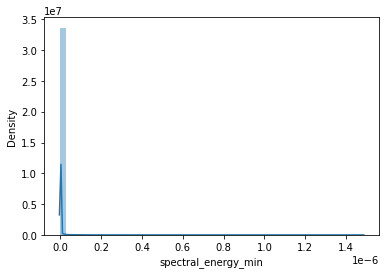

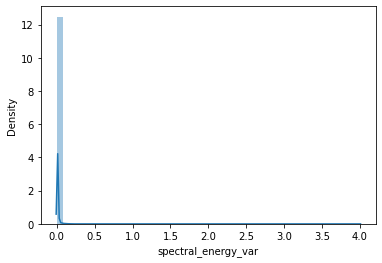

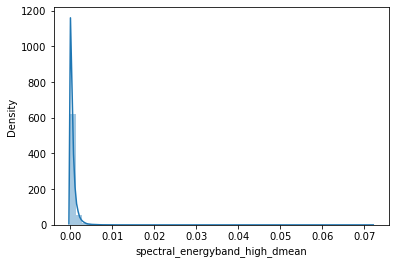

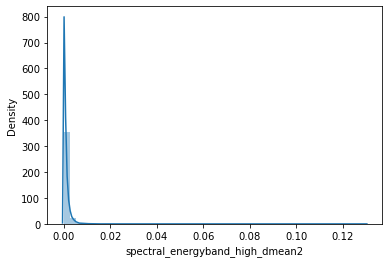

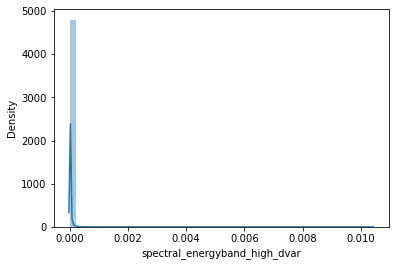

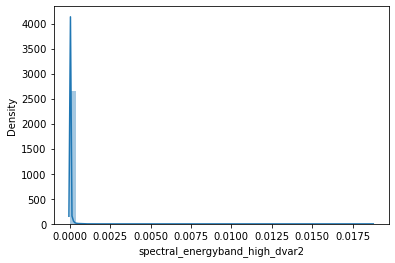

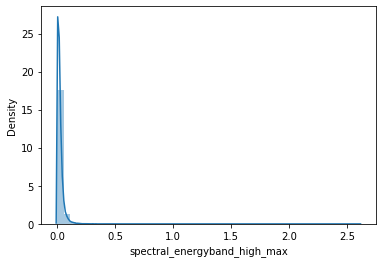

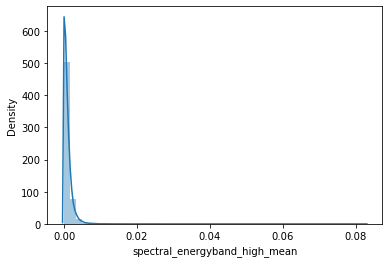

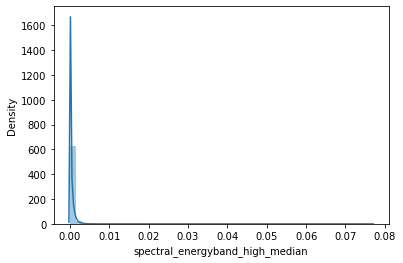

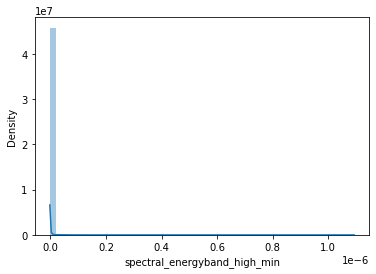

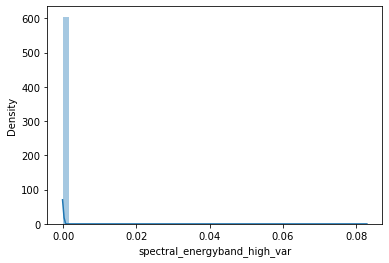

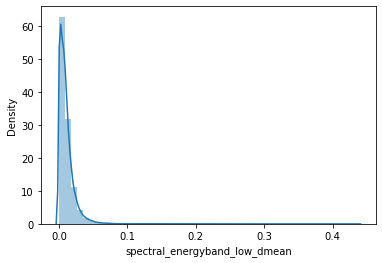

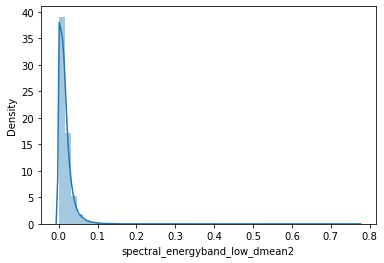

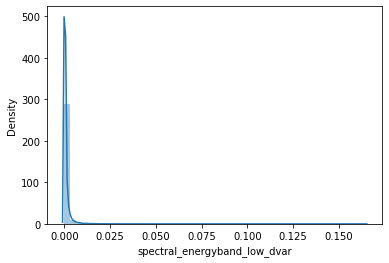

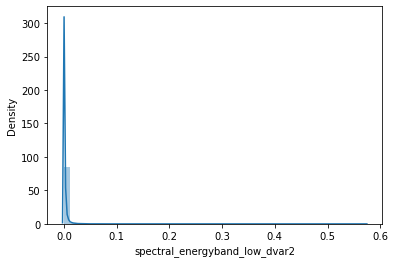

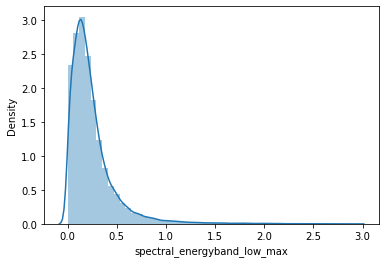

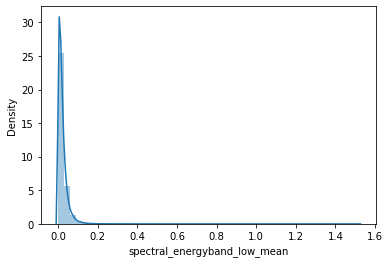

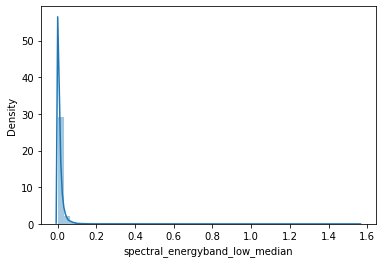

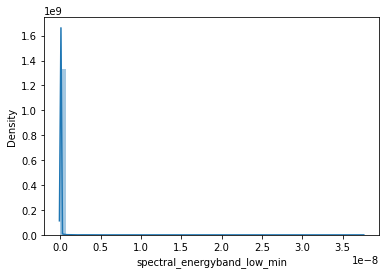

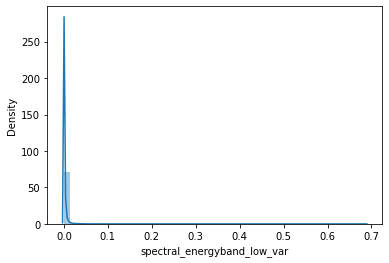

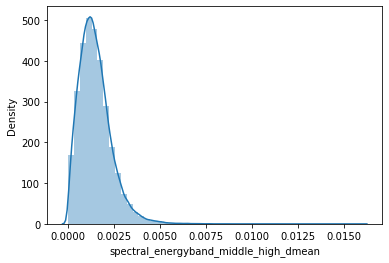

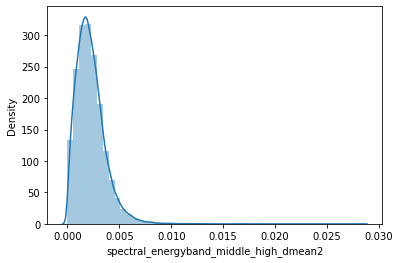

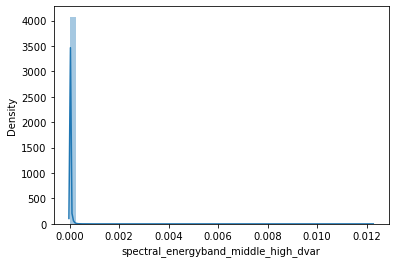

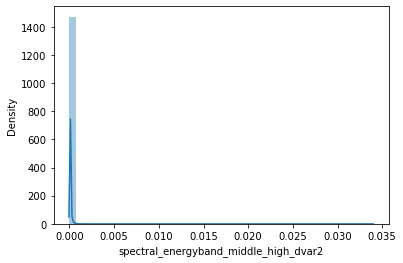

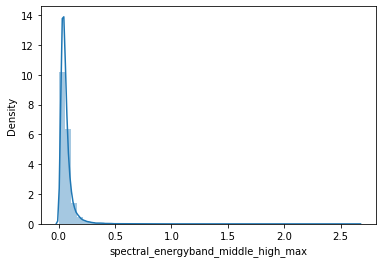

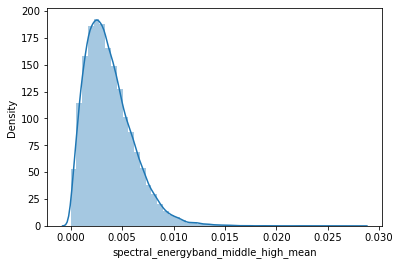

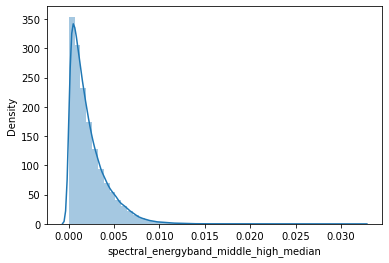

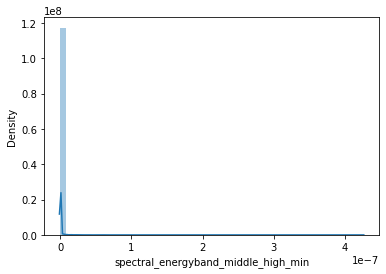

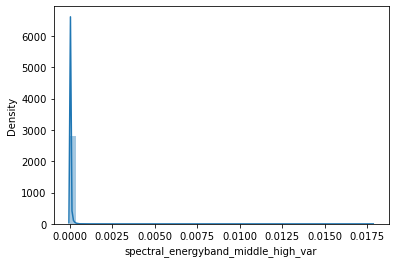

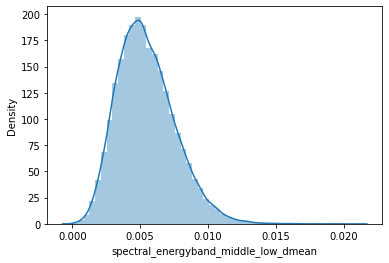

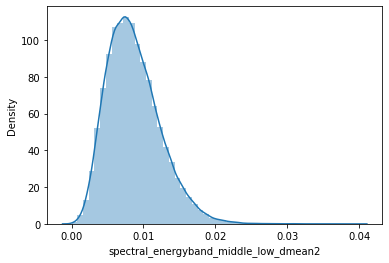

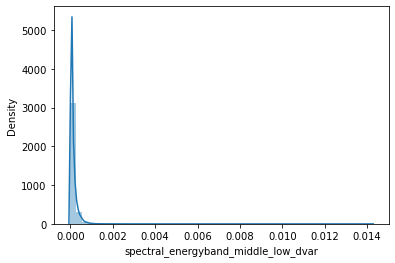

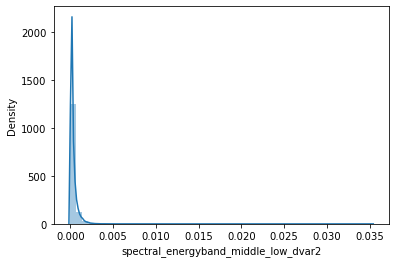

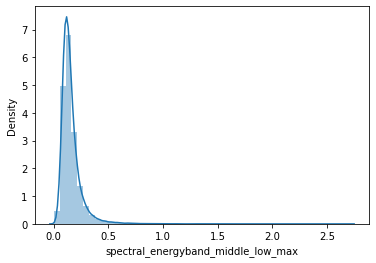

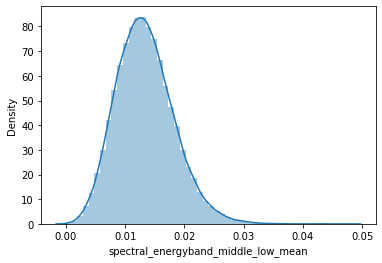

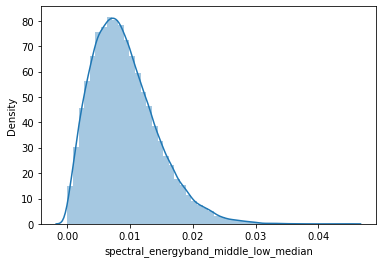

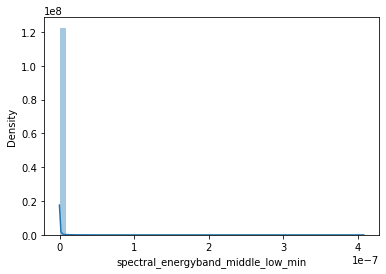

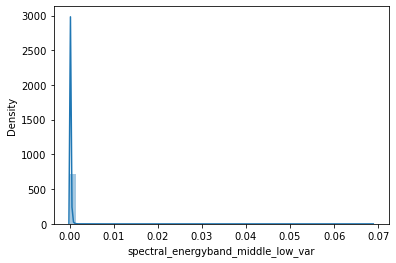

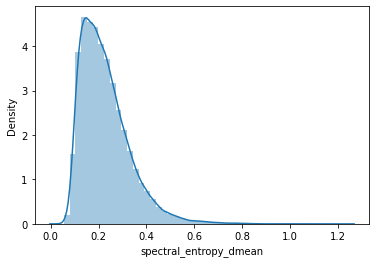

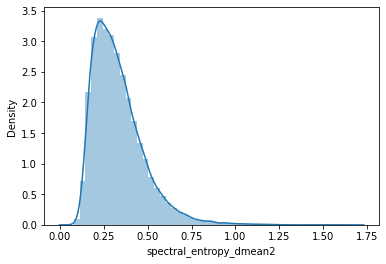

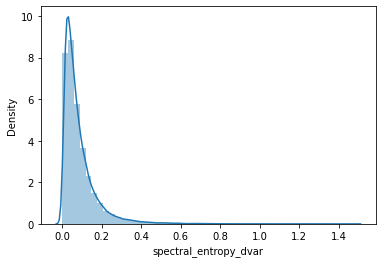

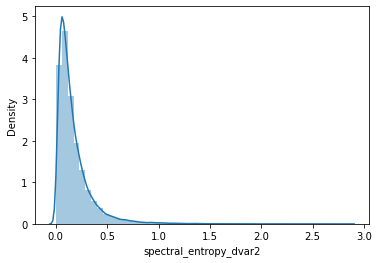

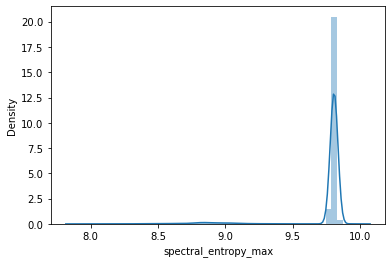

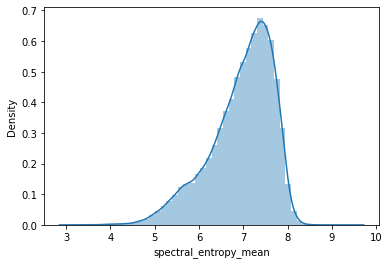

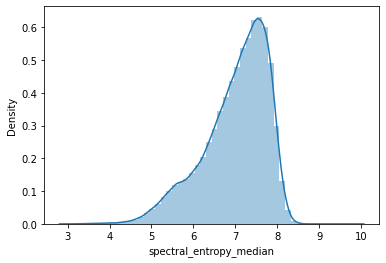

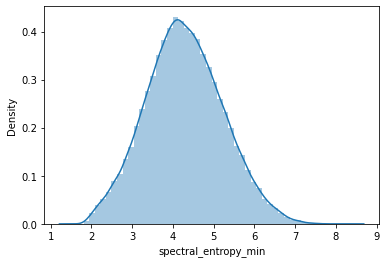

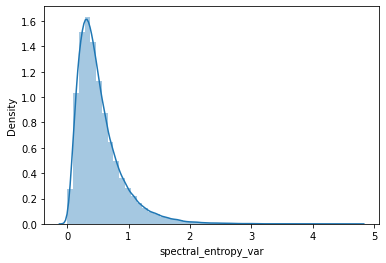

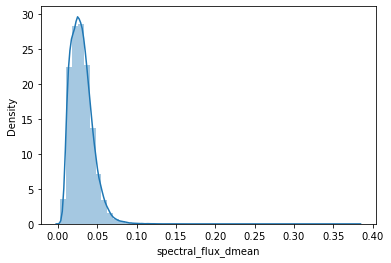

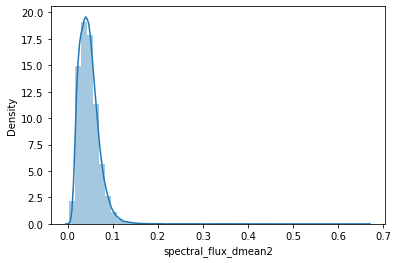

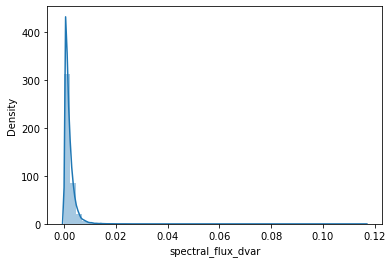

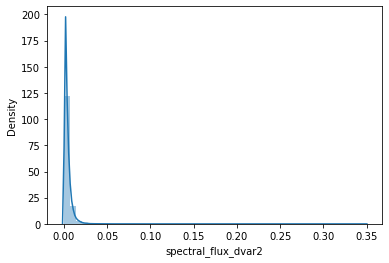

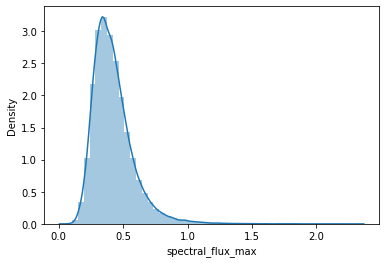

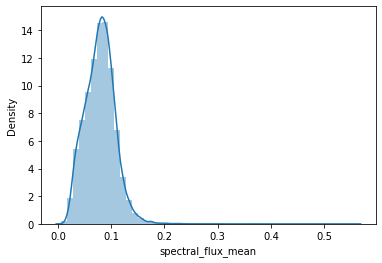

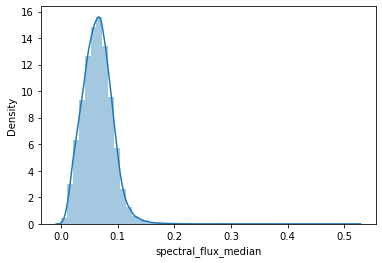

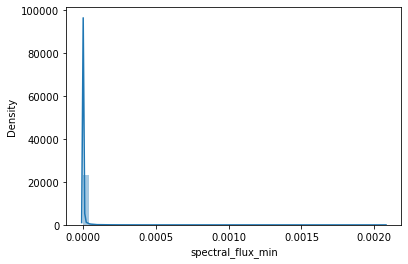

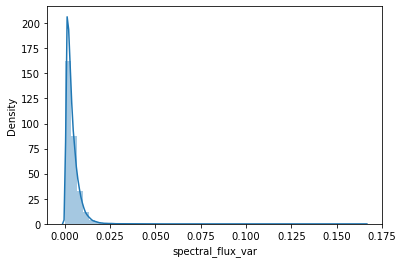

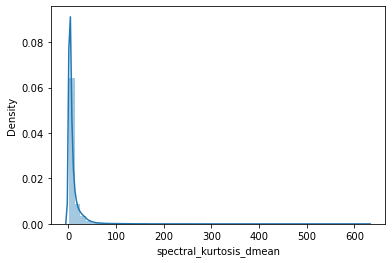

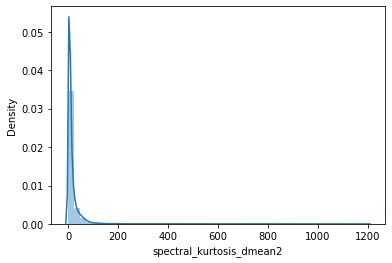

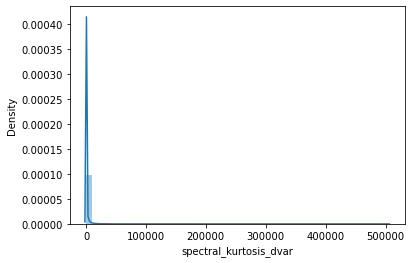

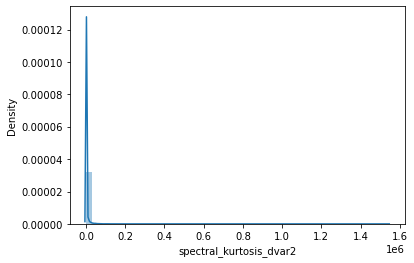

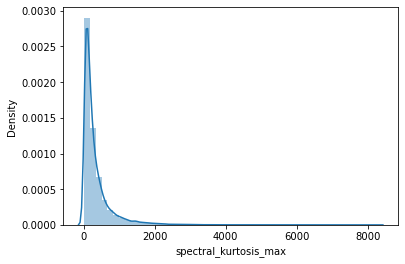

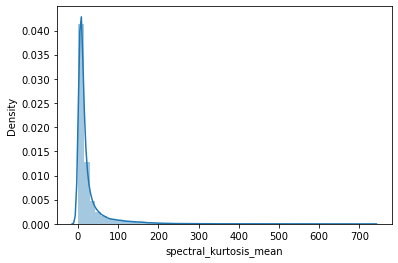

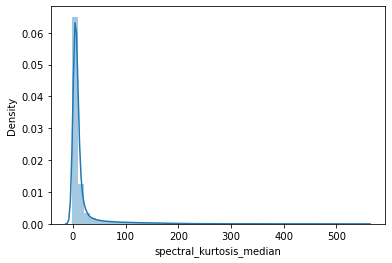

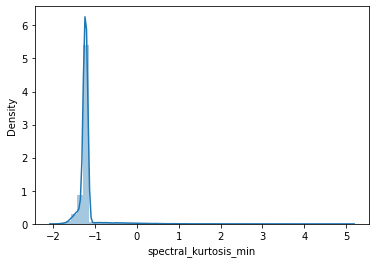

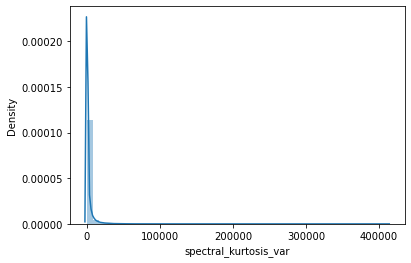

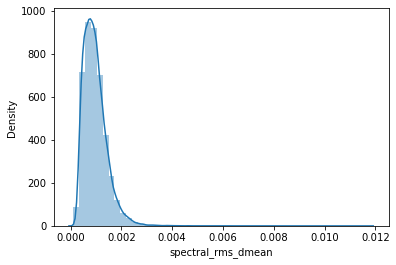

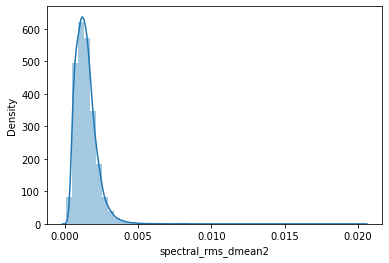

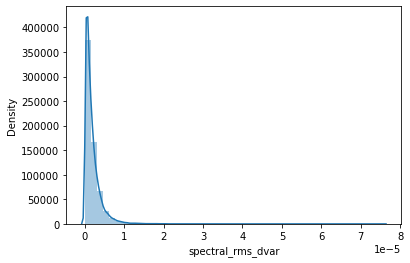

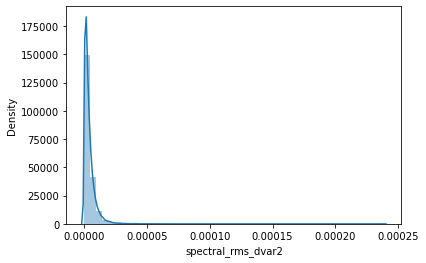

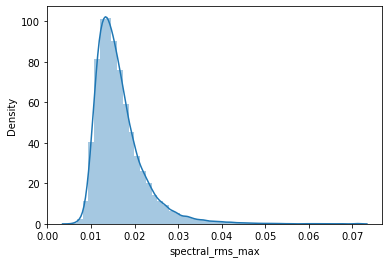

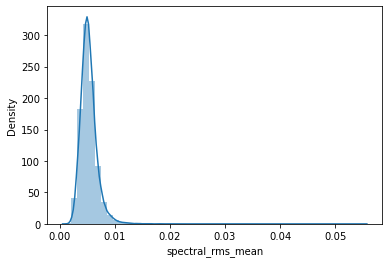

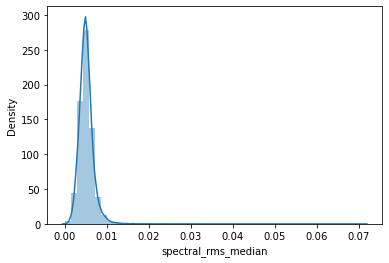

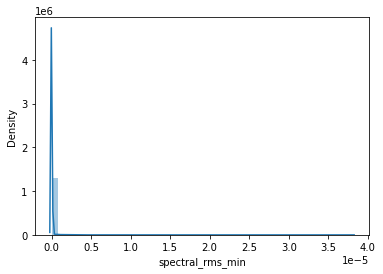

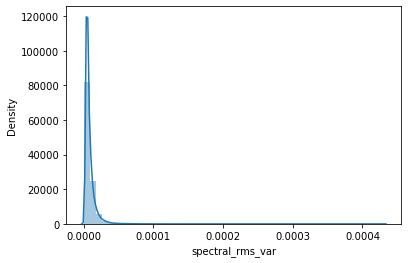

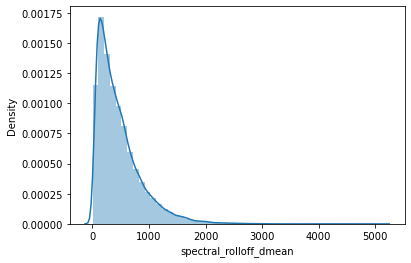

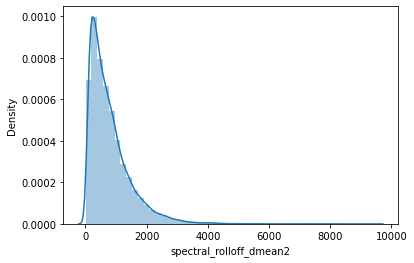

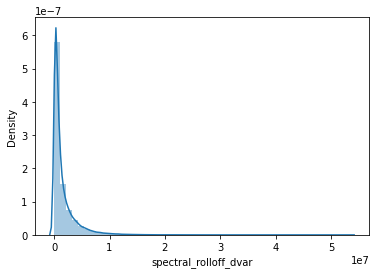

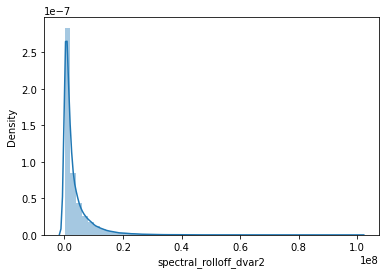

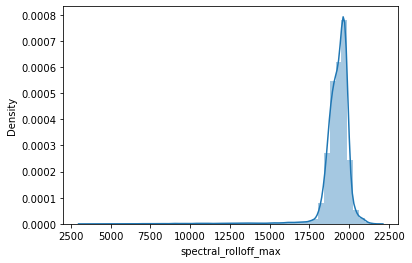

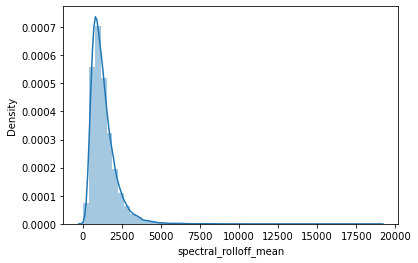

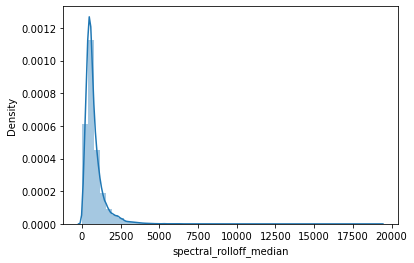

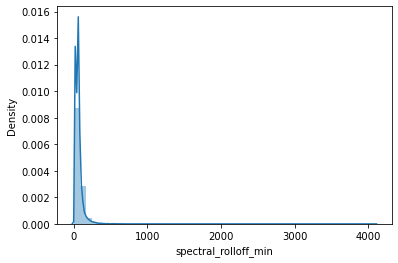

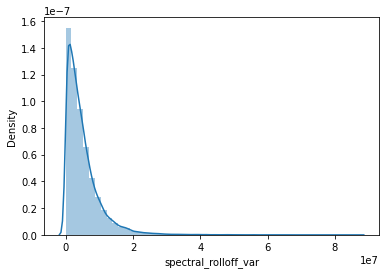

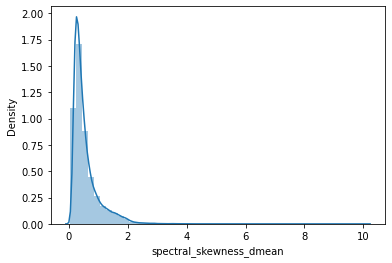

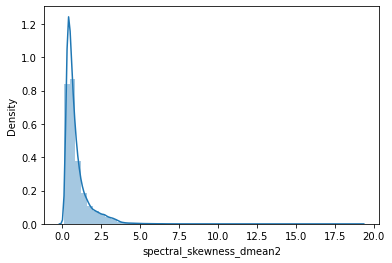

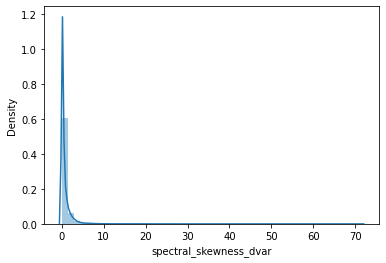

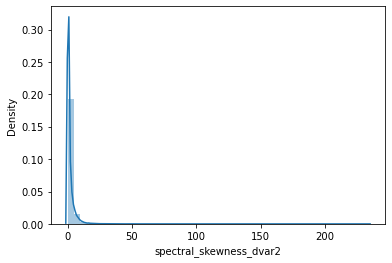

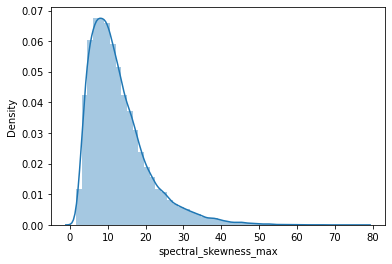

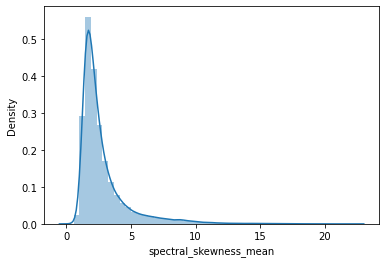

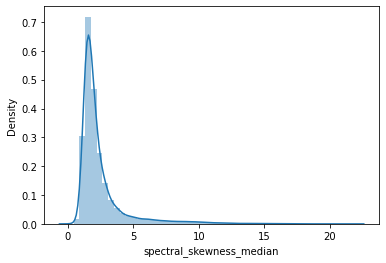

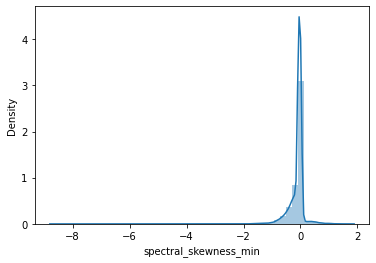

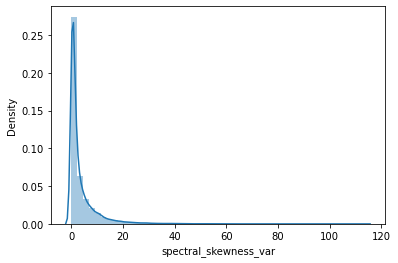

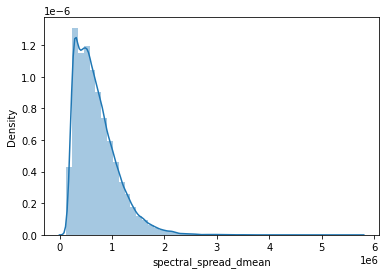

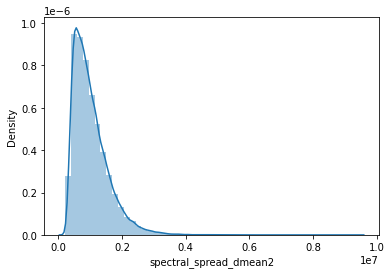

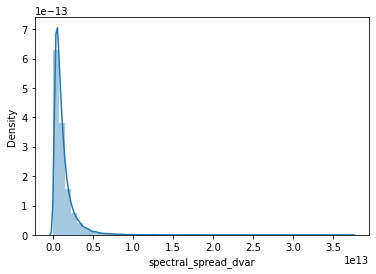

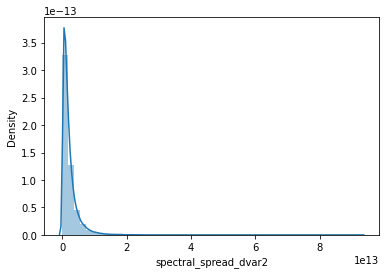

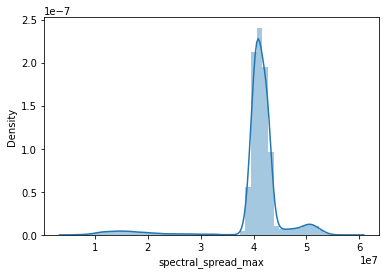

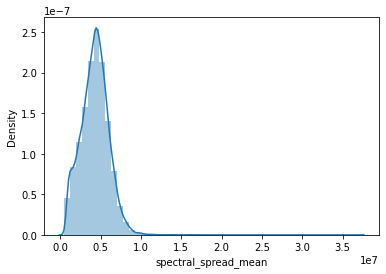

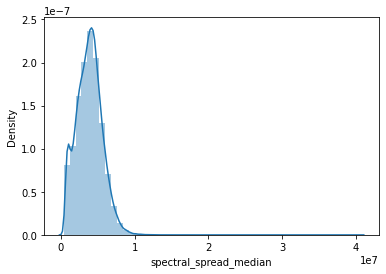

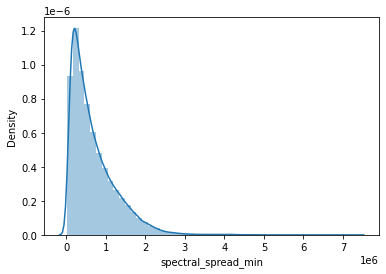

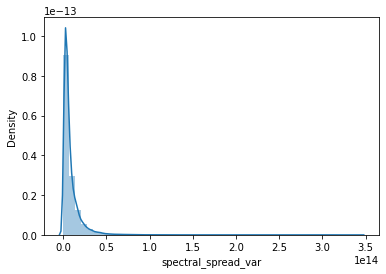

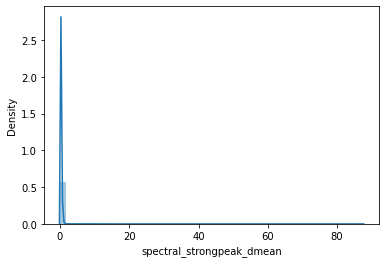

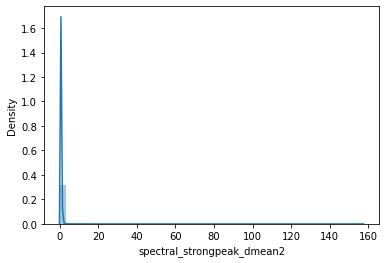

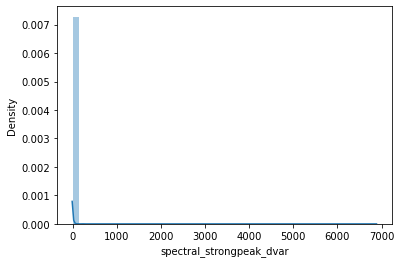

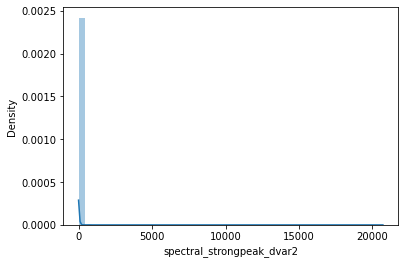

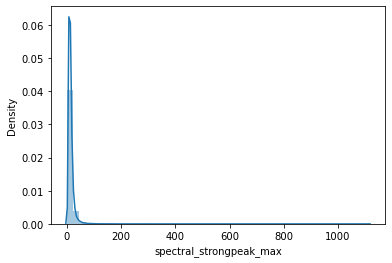

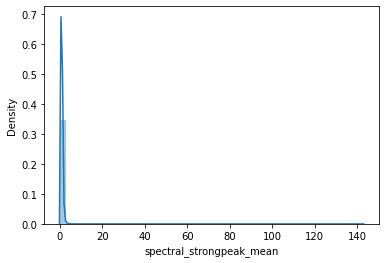

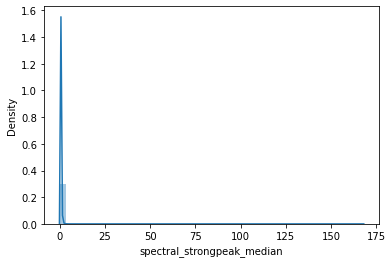

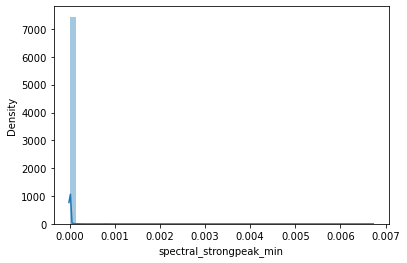

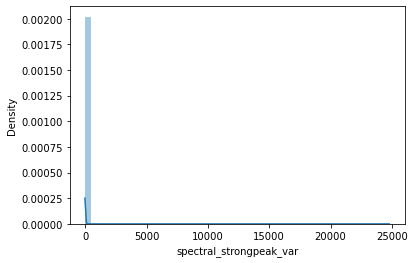

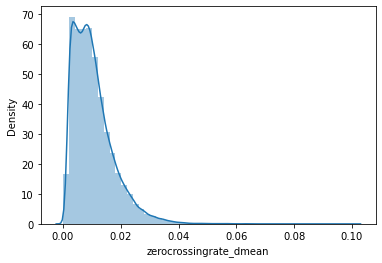

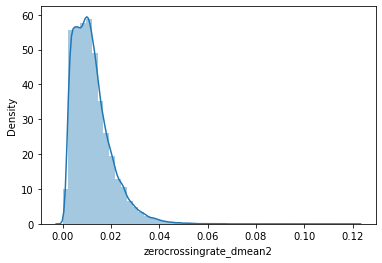

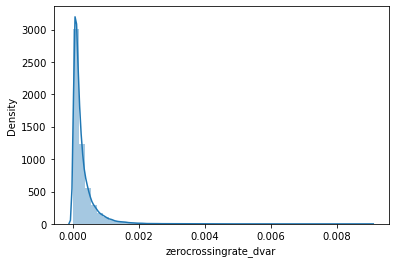

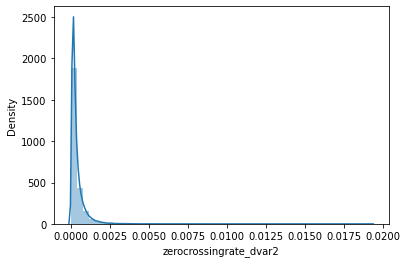

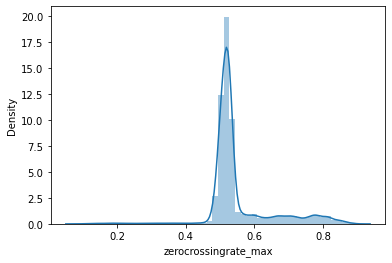

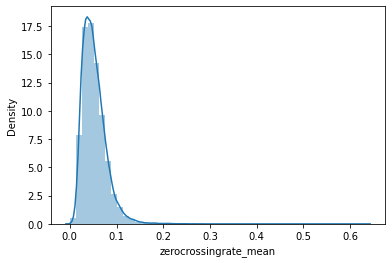

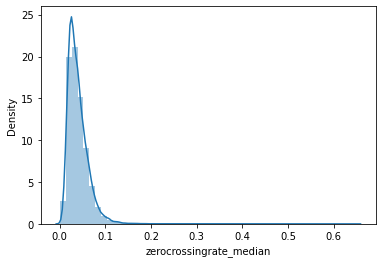

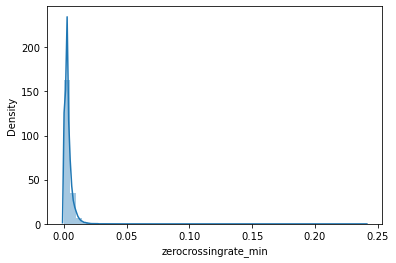

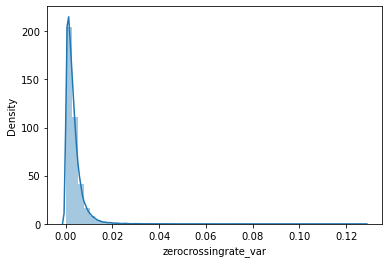

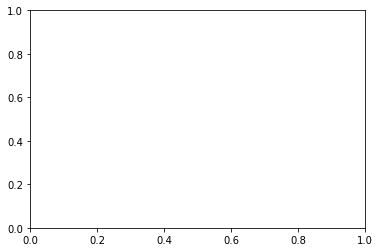

In [18]:
for i, col in enumerate(df_data.columns):
    plt.figure(i)
    sns.distplot(df_data[col])

In [22]:
#From Danny's Code:

# get counts for each genre
genre_cols = [i for i in df if i[0:5] == 'genre']
df_data[genre_cols].sum()

genre_60s             179
genre_70s             202
genre_80s             312
genre_90s             359
genre_acidjazz        304
                     ... 
genre_trance         1528
genre_tribal          175
genre_triphop        1343
genre_world          1887
genre_worldfusion     214
Length: 95, dtype: int64

In [20]:

base_genres = [
    'genre_pop',                  # 7805
    'genre_rock',                 # 6865
    'genre_classical',            # 5602
    'genre_hiphop',               # 2657
    'genre_jazz',                 # 2371
    'genre_metal',                # 1435
    'genre_reggae',               # 1245
    'genre_blues',                # 1082
    'genre_country',               # 584
    'genre_disco',                 # 447
]

In [24]:
df_data[base_genres].sum(axis=0).sort_values(ascending=False)

genre_pop          7805
genre_rock         6865
genre_classical    5602
genre_hiphop       2657
genre_jazz         2371
genre_metal        1435
genre_reggae       1245
genre_blues        1082
genre_country       584
genre_disco         447
dtype: int64

In [23]:
df_base = df_data[df_data[base_genres].sum(axis=1) > 0]
df_base_excluded = df_data[df_data[base_genres].sum(axis=1) == 0]

print(f"Tracks in base genre set: {df_base.shape[0]:,}")
print(f"Tracks not in base genre set: {df_base_excluded.shape[0]:,}")
print(f"Tracks in complete collection: {df.shape[0]:,}")

Tracks in base genre set: 25,562
Tracks not in base genre set: 29,651
Tracks in complete collection: 3,681


In [30]:
df_data[base_genres].sum(axis=0).sort_values(ascending=False)

genre_pop          7805
genre_rock         6865
genre_classical    5602
genre_hiphop       2657
genre_jazz         2371
genre_metal        1435
genre_reggae       1245
genre_blues        1082
genre_country       584
genre_disco         447
dtype: int64